# CHALLENGE: PREDICTING MOVEMENT BASED ON ACCELERATION

### Import packages

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
np.random.seed(12345)
import matplotlib.pyplot as plt
import os
import tsfresh
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import tsfresh.feature_extraction.feature_calculators as tsfeat
from sklearn.base import BaseEstimator, TransformerMixin
import platform
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay

### Import dataset

In [2]:
directory = 'Train2'
data=[]  
data_original=[]
    
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    if platform.system() == 'Windows':
        if f!="Train2\.DS_Store":
            data.append(pd.read_csv(f,header=None))
            data_original.append(pd.read_csv(f,header=None))    
    if platform.system() == 'Darwin' or platform.system() == 'Linux':
        if f!="Train2/.DS_Store":
            data.append(pd.read_csv(f,header=None))
            data_original.append(pd.read_csv(f,header=None)) 

In [3]:
data_labels=pd.read_csv("files.csv")

if platform.system() == 'Windows' or platform.system() == 'Linux':
    data_labels = data_labels.sort_values(by="folder",ascending=True)

# Define the mapping dictionary
value_mapping = {1: 1, 2: 1, 3: 1, 6: 2, 7: 2, 8: 2, 4: 3, 5: 3, 9: 3, 10: 3}

# Apply the mapping using pandas' replace method
data_labels.iloc[:, 3] = data_labels.iloc[:, 3].replace(value_mapping)

new_labels = np.array(data_labels.iloc[:,3])

## Exploratory Analysis

### Plot of all the data divided in groups

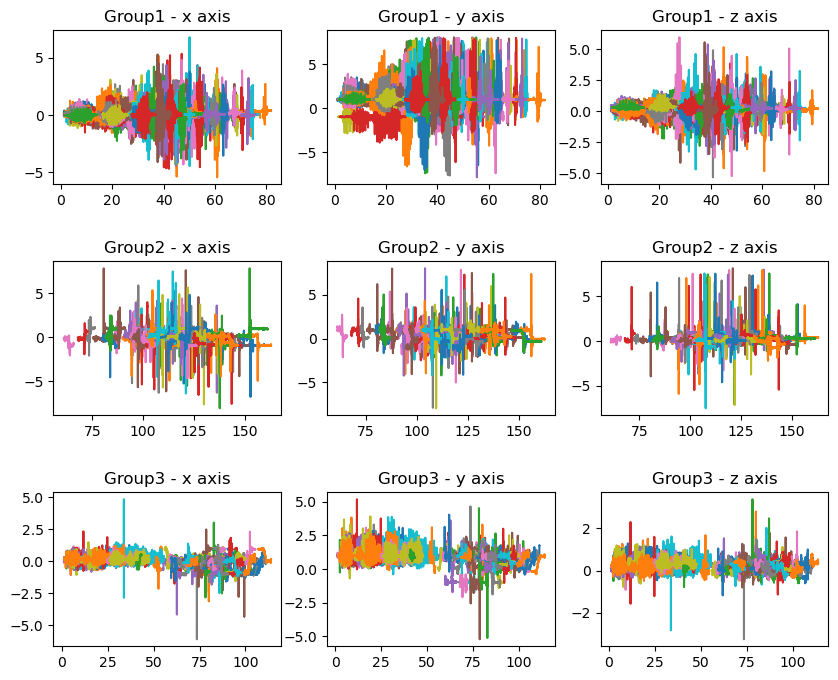

In [4]:
fig, axs =plt.subplots(3,3, figsize=(10,8))
axs = axs.flatten()

for i in range(np.shape(data_labels)[0]):
    if (data_labels.iloc[i,3]==1):
        axs[0].plot(data[i].iloc[:,3],data[i].iloc[:,0],'-')
        axs[1].plot(data[i].iloc[:,3],data[i].iloc[:,1],'-') 
        axs[2].plot(data[i].iloc[:,3],data[i].iloc[:,2],'-') 
        axs[0].set_title('Group1 - x axis')
        axs[1].set_title('Group1 - y axis')
        axs[2].set_title('Group1 - z axis')
        
    if (data_labels.iloc[i,3]==2):
        axs[3].plot(data[i].iloc[:,3],data[i].iloc[:,0],'-')
        axs[4].plot(data[i].iloc[:,3],data[i].iloc[:,1],'-') 
        axs[5].plot(data[i].iloc[:,3],data[i].iloc[:,2],'-')
        axs[3].set_title('Group2 - x axis')
        axs[4].set_title('Group2 - y axis')
        axs[5].set_title('Group2 - z axis')
        
    if (data_labels.iloc[i,3]==3):
        axs[6].plot(data[i].iloc[:,3],data[i].iloc[:,0],'-')
        axs[7].plot(data[i].iloc[:,3],data[i].iloc[:,1],'-') 
        axs[8].plot(data[i].iloc[:,3],data[i].iloc[:,2],'-') 
        axs[6].set_title('Group3 - x axis')
        axs[7].set_title('Group3 - y axis')
        axs[8].set_title('Group3 - z axis')
    fig.subplots_adjust(hspace=0.5) 

plt.show()

### Plot of one time series for each of the 3 subgroups in group 1 (Moving)

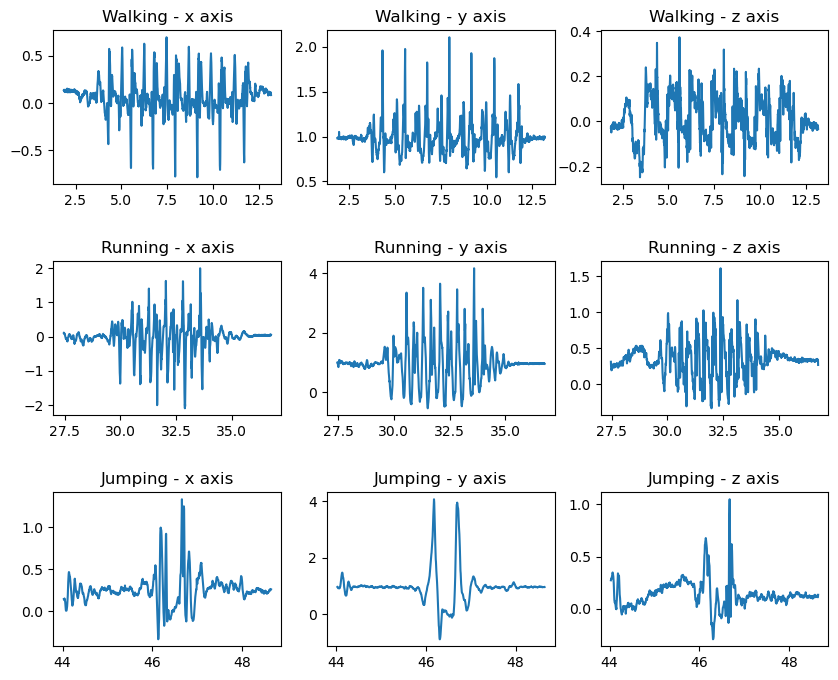

In [5]:
fig, axs =plt.subplots(3,3, figsize=(10,8))
axs = axs.flatten()

#MW
axs[0].plot(data[0].iloc[:,3],data[0].iloc[:,0],'-')
axs[1].plot(data[0].iloc[:,3],data[0].iloc[:,1],'-') 
axs[2].plot(data[0].iloc[:,3],data[0].iloc[:,2],'-')
axs[0].set_title('Walking - x axis')
axs[1].set_title('Walking - y axis')
axs[2].set_title('Walking - z axis')

#MR
axs[3].plot(data[467].iloc[:,3],data[467].iloc[:,0],'-')
axs[4].plot(data[467].iloc[:,3],data[467].iloc[:,1],'-') 
axs[5].plot(data[467].iloc[:,3],data[467].iloc[:,2],'-')
axs[3].set_title('Running - x axis')
axs[4].set_title('Running - y axis')
axs[5].set_title('Running - z axis')

#MJ
axs[6].plot(data[4].iloc[:,3],data[4].iloc[:,0],'-')
axs[7].plot(data[4].iloc[:,3],data[4].iloc[:,1],'-') 
axs[8].plot(data[4].iloc[:,3],data[4].iloc[:,2],'-')
axs[6].set_title('Jumping - x axis')
axs[7].set_title('Jumping - y axis')
axs[8].set_title('Jumping - z axis')

fig.subplots_adjust(hspace=0.5) 

### Plot of one time series for each of the 3 subgroups in group 2 (Falls)

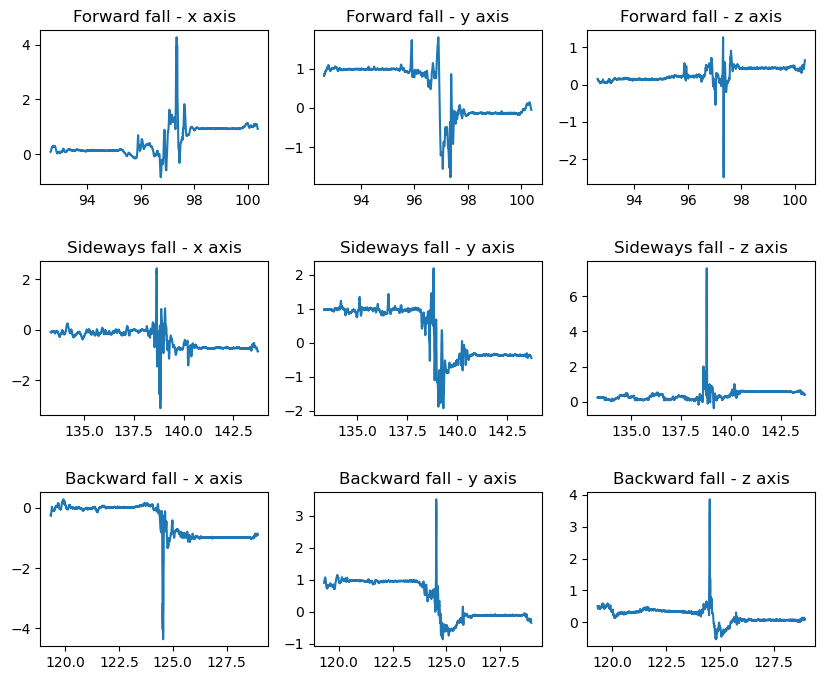

In [6]:
fig, axs =plt.subplots(3,3, figsize=(10,8))
axs = axs.flatten()

#FF
axs[0].plot(data[5].iloc[:,3],data[5].iloc[:,0],'-')
axs[1].plot(data[5].iloc[:,3],data[5].iloc[:,1],'-') 
axs[2].plot(data[5].iloc[:,3],data[5].iloc[:,2],'-')
axs[0].set_title('Forward fall - x axis')
axs[1].set_title('Forward fall - y axis')
axs[2].set_title('Forward fall - z axis')

#FS
axs[3].plot(data[7].iloc[:,3],data[7].iloc[:,0],'-')
axs[4].plot(data[7].iloc[:,3],data[7].iloc[:,1],'-') 
axs[5].plot(data[7].iloc[:,3],data[7].iloc[:,2],'-')
axs[3].set_title('Sideways fall - x axis')
axs[4].set_title('Sideways fall - y axis')
axs[5].set_title('Sideways fall - z axis')

#FB
axs[6].plot(data[3].iloc[:,3],data[3].iloc[:,0],'-')
axs[7].plot(data[3].iloc[:,3],data[3].iloc[:,1],'-') 
axs[8].plot(data[3].iloc[:,3],data[3].iloc[:,2],'-')
axs[6].set_title('Backward fall - x axis')
axs[7].set_title('Backward fall - y axis')
axs[8].set_title('Backward fall - z axis')

fig.subplots_adjust(hspace=0.5) 

### Plot of one time series for each of the 4 subgroups in group 3 (Others)

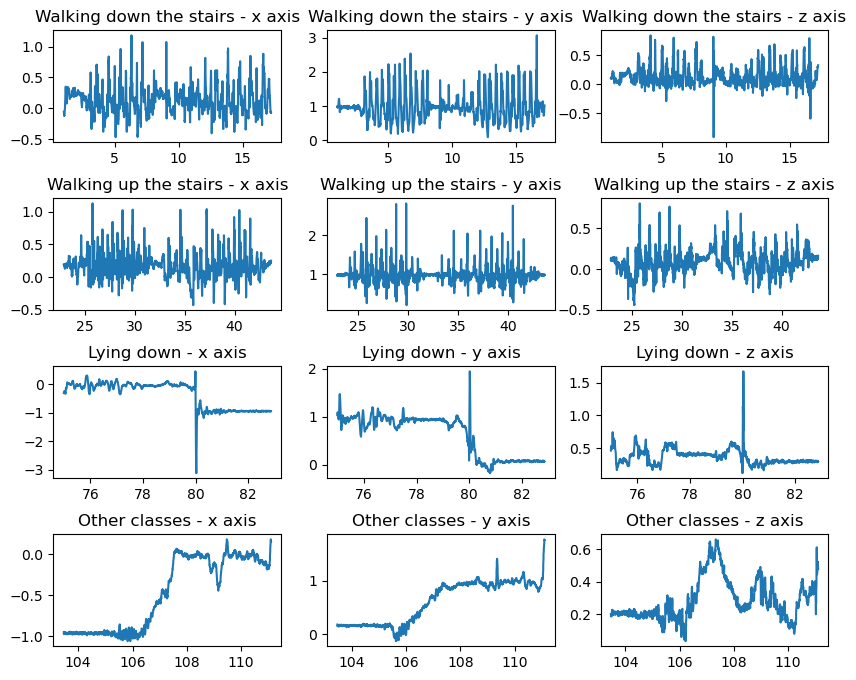

In [7]:
fig, axs =plt.subplots(4,3, figsize=(10,8))
axs = axs.flatten()

#WD
axs[0].plot(data[29].iloc[:,3],data[29].iloc[:,0],'-')
axs[1].plot(data[29].iloc[:,3],data[29].iloc[:,1],'-') 
axs[2].plot(data[29].iloc[:,3],data[29].iloc[:,2],'-')
axs[0].set_title('Walking down the stairs - x axis')
axs[1].set_title('Walking down the stairs - y axis')
axs[2].set_title('Walking down the stairs - z axis')

#WU
axs[3].plot(data[50].iloc[:,3],data[50].iloc[:,0],'-')
axs[4].plot(data[50].iloc[:,3],data[50].iloc[:,1],'-') 
axs[5].plot(data[50].iloc[:,3],data[50].iloc[:,2],'-')
axs[3].set_title('Walking up the stairs - x axis')
axs[4].set_title('Walking up the stairs - y axis')
axs[5].set_title('Walking up the stairs - z axis')

#LD
axs[6].plot(data[11].iloc[:,3],data[11].iloc[:,0],'-')
axs[7].plot(data[11].iloc[:,3],data[11].iloc[:,1],'-') 
axs[8].plot(data[11].iloc[:,3],data[11].iloc[:,2],'-')
axs[6].set_title('Lying down - x axis')
axs[7].set_title('Lying down - y axis')
axs[8].set_title('Lying down - z axis')

#OT
axs[9].plot(data[2].iloc[:,3],data[2].iloc[:,0],'-')
axs[10].plot(data[2].iloc[:,3],data[2].iloc[:,1],'-') 
axs[11].plot(data[2].iloc[:,3],data[2].iloc[:,2],'-')
axs[9].set_title('Other classes - x axis')
axs[10].set_title('Other classes - y axis')
axs[11].set_title('Other classes - z axis')

fig.subplots_adjust(hspace=0.5) 

## Data Preparation

### Rename columns

In [8]:
def rename_columns_list(data):
    # Change column names of each DataFrame in the list
    new_column_names = ['x', 'y', 'z', 'time']
    data = [df.rename(columns=dict(zip(df.columns, new_column_names))) for df in data]
    return data

renamer = FunctionTransformer(rename_columns_list)

### Fix the initial time equal to 0

In [9]:
def subtract_first_row(data):
    # Put time to 0
    data = [df.assign(time=df['time'] - df.iloc[0]['time']) for df in data]
    return data

subtracter = FunctionTransformer(subtract_first_row)

## Feature engineering

### Definition of a function for the feature extraction

In [10]:
import tsfresh.feature_extraction.feature_calculators as tsfeat
from sklearn.base import BaseEstimator, TransformerMixin

# Custom transformer for feature extraction
class FeatureExtractor(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        df_features = pd.DataFrame(columns=range(60))  # Assuming df_features has 60 columns
        
        for i, df in enumerate(X):
            for j in range(3):
                
                d = df.iloc[:, j]
                d = d - d.mean()
                
                feat = tsfeat.abs_energy(d)
                df_features.loc[i, j] = feat
                
                feat = max(d.max(), -d.min())
                df_features.loc[i, j + 3] = feat
                
                feat = tsfeat.absolute_sum_of_changes(d)
                df_features.loc[i, j + 6] = feat
                
                feat = tsfeat.autocorrelation(d, 5)
                df_features.loc[i, j + 9] = feat
                
                feat = d.var()
                df_features.loc[i, j + 12] = feat
                
                feat = d.max() - d.min()
                df_features.loc[i, j + 15] = feat
                
                for k in range(3):
                    feat = tsfeat.count_above(d, k)
                    df_features.loc[i, j + 18 + k * 3] = feat
                    
                    feat = tsfeat.count_below(d, -k)
                    df_features.loc[i, j + 27 + k * 3] = feat
                
                feat = list(tsfeat.fft_aggregated(d, param=[{"aggtype": "centroid"}]))[0][1]
                df_features.loc[i, j + 36] = feat
                
                feat = list(tsfeat.fft_aggregated(d, param=[{"aggtype": "variance"}]))[0][1]
                df_features.loc[i, j + 39] = feat
                
                feat = list(tsfeat.fft_aggregated(d, param=[{"aggtype": "skew"}]))[0][1]
                df_features.loc[i, j + 42] = feat
                
                feat = tsfeat.first_location_of_maximum(d)
                df_features.loc[i, j + 45] = feat
                
                feat = tsfeat.first_location_of_minimum(d)
                df_features.loc[i, j + 48] = feat
                
                feat = tsfeat.longest_strike_above_mean(d)
                df_features.loc[i, j + 51] = feat
                
                feat = tsfeat.longest_strike_below_mean(d)
                df_features.loc[i, j + 54] = feat
                
                feat = tsfeat.mean_change(d)
                df_features.loc[i, j + 57] = feat
        
        return df_features.values

### Definition of a function that renames the columns associated to the new features and sets the type of variables

In [11]:
def rename_and_cast_type(data):

    new_column_names = ['energy_x', 'energy_y', 'energy_z', 'max_abs_x', 'max_abs_y', 'max_abs_z',
                     'sum_changes_x', 'sum_changes_y', 'sum_changes_z', 'autocorr_x', 'autocorr_y', 'autocorr_z',
                     'var_x', 'var_y', 'var_z', 'range_x', 'range_y', 'range_z',
                     'tres_ab_1_x', 'tres_ab_1_y', 'tres_ab_1_z','tres_ab_2_x', 'tres_ab_2_y', 'tres_ab_2_z',
                     'tres_ab_3_x', 'tres_ab_3_y', 'tres_ab_3_z',
                    'tres_be_1_x', 'tres_be_1_y', 'tres_be_1_z',
                     'tres_be_2_x', 'tres_be_2_y', 'tres_be_2_z', 'tres_be_3_x', 'tres_be_3_y', 'tres_be_3_z',
                      'center_four_x', 'center-four_y','center_four_z', 'var_four_x', 'var_four_y', 'var_four_z',
                     'skew_x', 'skew_y', 'skew_z',
                     'pos_max_x', 'pos_max_y', 'pos_max_z', 'pos_min_x', 'pos_min_y', 'pos_min_z',
                     'subseq_bigger_x', 'subseq_bigger_y', 'subseq_bigger_z', 'subseq_smaller_x', 'subseq_smaller_y', 'subseq_smaller_z',
                     'avg_diff_x', 'avg_diff_y', 'avg_diff_z','Label']
    
    data = data.rename(columns=dict(zip(data.columns, new_column_names)))
        
    categorical = ['max_more_one_x','max_more_one_y', 'max_more_one_z', 'min_more_one_x', 'min_more_one_y', 'min_more_one_z',
              'std_x', 'std_y', 'std_z','Label']
        
    data = data.astype(float)

    for col in categorical:
        data[col] = data[col].astype('category')
    
    return data

caster_type = FunctionTransformer(rename_and_cast_type)

In [12]:
def rename_column_list_new(data):
    
    names = ['energy_x', 'energy_y', 'energy_z', 'max_abs_x', 'max_abs_y', 'max_abs_z',
                     'sum_changes_x', 'sum_changes_y', 'sum_changes_z', 'autocorr_x', 'autocorr_y', 'autocorr_z',
                     'var_x', 'var_y', 'var_z', 'range_x', 'range_y', 'range_z',
                     'tres_ab_1_x', 'tres_ab_1_y', 'tres_ab_1_z','tres_ab_2_x', 'tres_ab_2_y', 'tres_ab_2_z',
                     'tres_ab_3_x', 'tres_ab_3_y', 'tres_ab_3_z',
                    'tres_be_1_x', 'tres_be_1_y', 'tres_be_1_z',
                     'tres_be_2_x', 'tres_be_2_y', 'tres_be_2_z', 'tres_be_3_x', 'tres_be_3_y', 'tres_be_3_z',
                      'center_four_x', 'center-four_y','center_four_z', 'var_four_x', 'var_four_y', 'var_four_z',
                     'skew_x', 'skew_y', 'skew_z',
                     'pos_max_x', 'pos_max_y', 'pos_max_z', 'pos_min_x', 'pos_min_y', 'pos_min_z',
                     'subseq_bigger_x', 'subseq_bigger_y', 'subseq_bigger_z', 'subseq_smaller_x', 'subseq_smaller_y', 'subseq_smaller_z',
                     'avg_diff_x', 'avg_diff_y', 'avg_diff_z']
    
    data =  pd.DataFrame(data, columns = names)
        
    data = data.astype(float)
    
    return data

renamer_2 = FunctionTransformer(rename_column_list_new)

### Apply these processes to our dataset

In [13]:
# Define the pipeline
pipeline_transform = Pipeline([
        ('renamer', renamer),
        ('subtracter',subtracter),
        ('features', FeatureExtractor()),
        ('renamer_2', renamer_2)
])

# Apply the transformation to each DataFrame
transformed_data = pipeline_transform.transform(data)

### Histograms of the new variables

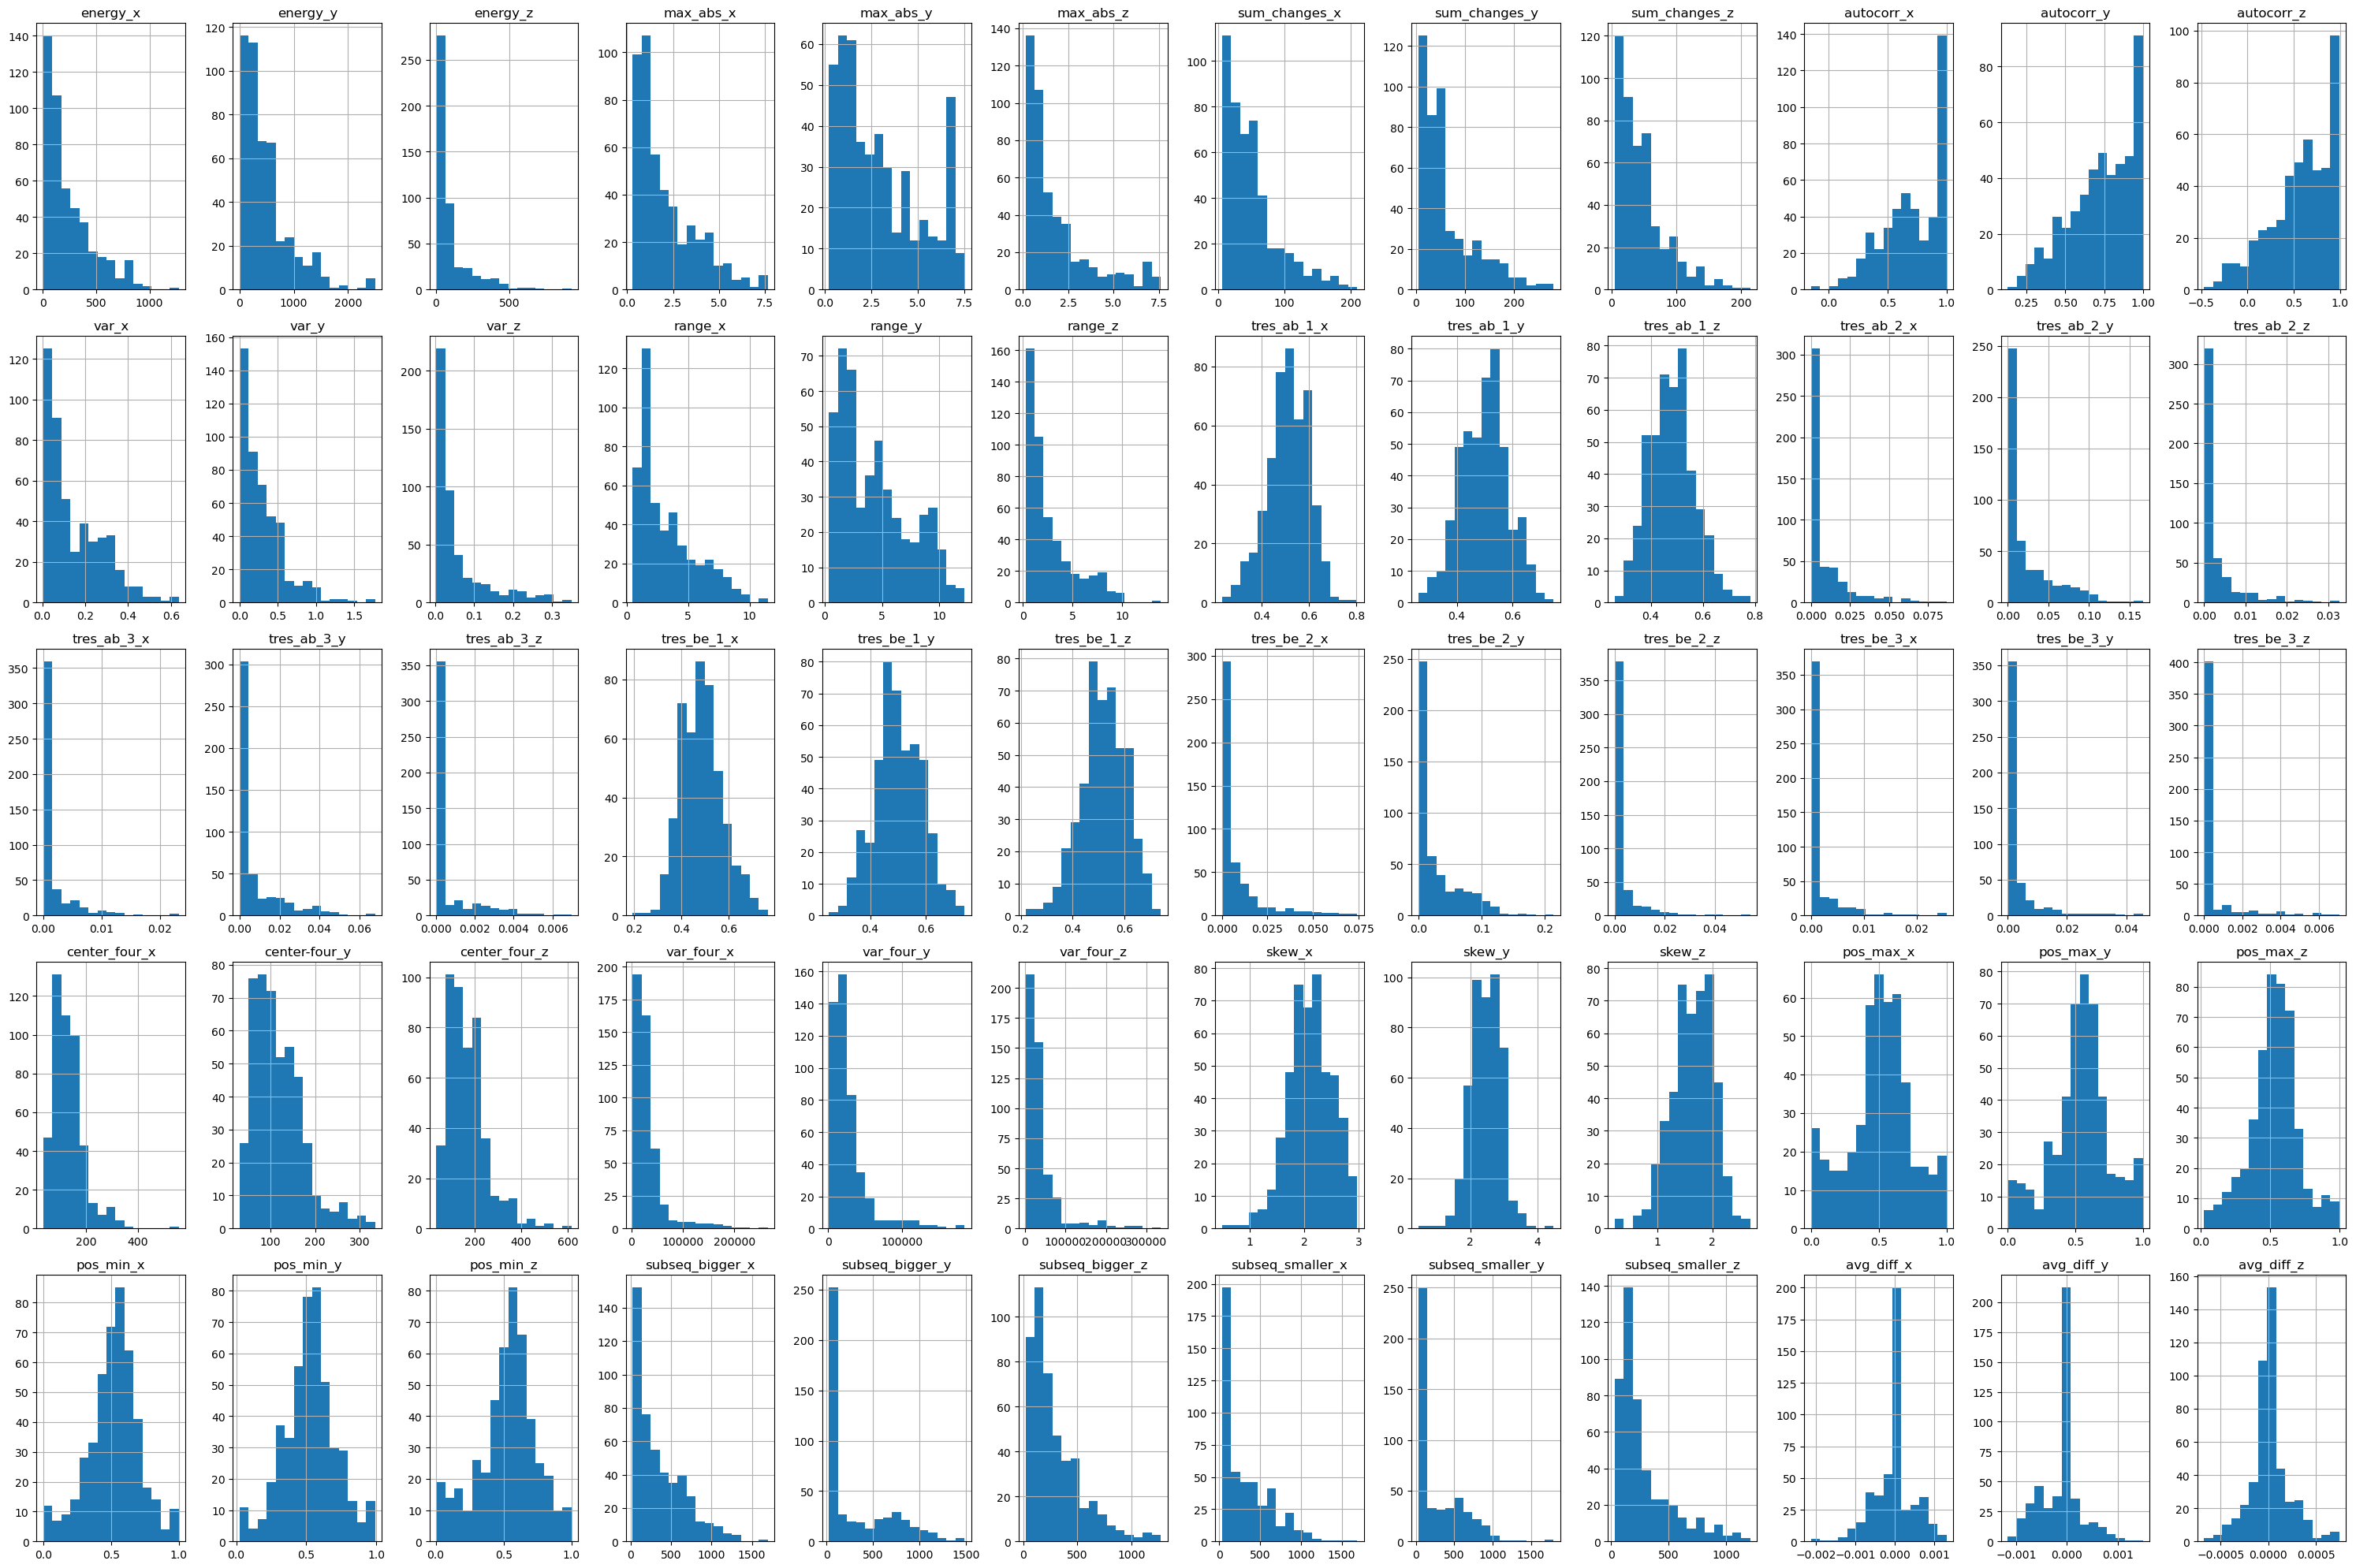

In [14]:
fig, axs =plt.subplots(5,12, figsize=(30,20))
transformed_data.iloc[:,0:60].hist(ax=axs, bins=15)
for i,ax in enumerate(axs.flatten()):
    ax.set_title(transformed_data.iloc[:,0:60].columns[i])
plt.tight_layout()
plt.show()

### 3D plot of the variable 'Energy' 

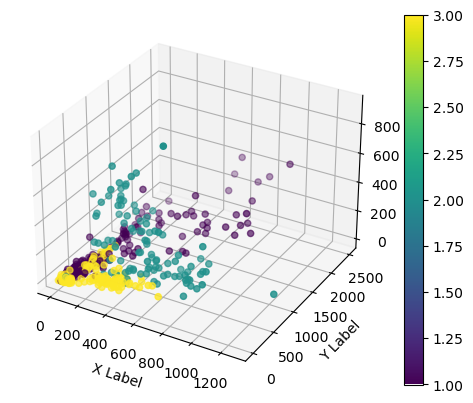

In [15]:
from mpl_toolkits.mplot3d import Axes3D

# create 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# scatter plot with color coding
scatter = ax.scatter(transformed_data['energy_x'], transformed_data['energy_y'], transformed_data['energy_z'], 
                     c=new_labels, cmap='viridis')
plt.colorbar(scatter)

# set axis labels
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

# show plot
plt.show()

### Correlation matrix that highlights only strongly correlated variables

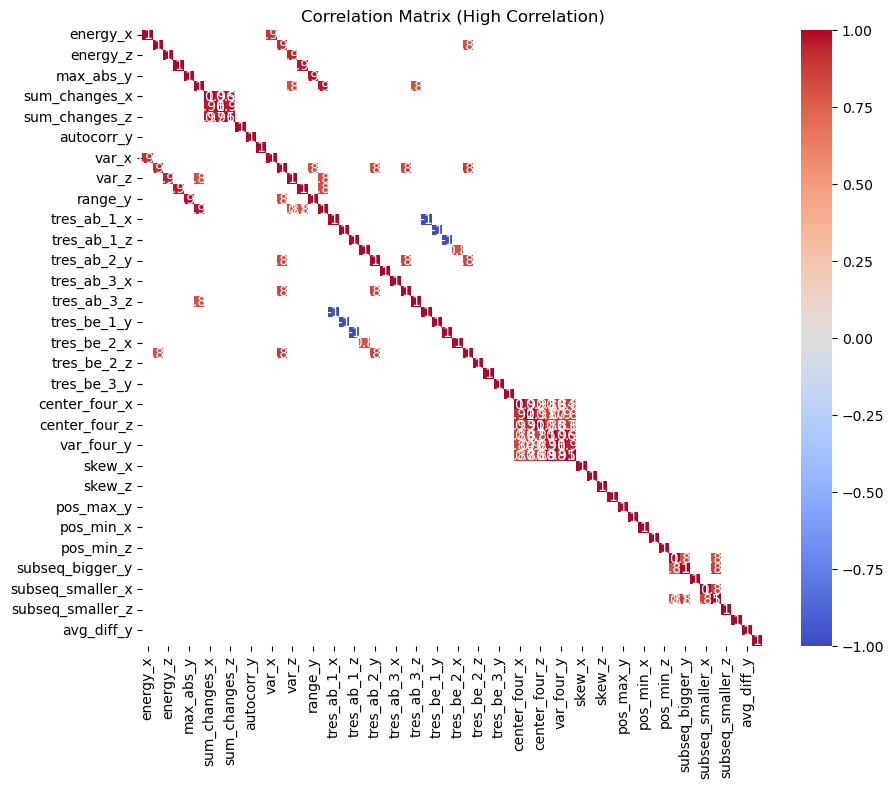

In [16]:
corr_matrix=transformed_data.corr()
threshold = 0.8

mask = np.abs(corr_matrix) > threshold
subset_corr_matrix = corr_matrix[mask]

plt.figure(figsize=(10, 8))
sns.heatmap(subset_corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix (High Correlation)")
plt.show()

# Models

### Definition of the models and computation of the accuracy

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.base import clone
from sklearn.pipeline import make_pipeline
from sklearn import tree

rand_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    transformed_data, new_labels, random_state=rand_state, test_size=0.25)

# Define the individual classifiers

decision_tree = DecisionTreeClassifier(max_depth=10, random_state=rand_state)
random_forest = RandomForestClassifier(n_estimators=5, random_state=rand_state)
logistic_regression = LogisticRegression(solver="lbfgs", random_state=rand_state)
svm_classifier = SVC(kernel='linear', probability= True, random_state=rand_state)
bagging_classifier = BaggingClassifier(DecisionTreeClassifier(), n_estimators=500, 
                                       max_samples=100, bootstrap=True, random_state=rand_state)
voting_classifier = VotingClassifier(estimators=[
                ('random_forest', random_forest),
                ('logistic_regression', logistic_regression),
                ('svm_classifier', svm_classifier)], voting="soft")

# Create separate instances of each estimator

decision_tree_pipeline = make_pipeline(
    StandardScaler(),
    clone(decision_tree)
)

random_forest_pipeline = make_pipeline(
    StandardScaler(),
    clone(random_forest)
)

logistic_regression_pipeline = make_pipeline(
    StandardScaler(),
    clone(logistic_regression)
)

svm_pipeline = make_pipeline(
    StandardScaler(),
    clone(svm_classifier)
)

bagging_pipeline = make_pipeline(
    StandardScaler(),
    clone(bagging_classifier)
)

voting_pipeline = make_pipeline(
    StandardScaler(),
    clone(voting_classifier)
)

# Fit each model separately within the same pipeline

decision_tree_pipeline.fit(X_train, y_train)
random_forest_pipeline.fit(X_train, y_train)
logistic_regression_pipeline.fit(X_train, y_train)
svm_pipeline.fit(X_train, y_train)
bagging_pipeline.fit(X_train, y_train)
voting_pipeline.fit(X_train, y_train)

# 

fitted_tree = decision_tree_pipeline.named_steps['decisiontreeclassifier']
fitted_random_forest = random_forest_pipeline.named_steps['randomforestclassifier']
fitted_logistic = logistic_regression_pipeline.named_steps['logisticregression']
fitted_svm = svm_pipeline.named_steps['svc']
fitted_bagging = bagging_pipeline.named_steps['baggingclassifier']

# Evaluate each model individually

decision_tree_score = decision_tree_pipeline.score(X_test, y_test)
random_forest_score = random_forest_pipeline.score(X_test, y_test)
logistic_regression_score = logistic_regression_pipeline.score(X_test, y_test)
svm_score = svm_pipeline.score(X_test, y_test)
bagging_score = bagging_pipeline.score(X_test, y_test)
voting_score = voting_pipeline.score(X_test, y_test)

print("Decision Tree model score:", decision_tree_score)
print("Random Forest model score:", random_forest_score)
print("Logistic Regression model score:", logistic_regression_score)
print("SVM model score:", svm_score)
print("Bagging model score:", bagging_score)
print("Voting model score:", voting_score)

Decision Tree model score: 0.9316239316239316
Random Forest model score: 0.9487179487179487
Logistic Regression model score: 0.9572649572649573
SVM model score: 0.9829059829059829
Bagging model score: 0.9572649572649573
Voting model score: 0.9829059829059829


### Definition of a function to compute precision and recall and a function to plot the roc curve

In [18]:
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report 
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc

def compute_indexes (y_test,model,X_test):

  true_labels = y_test
  predicted_labels=model.predict(X_test)
  # Compute precision
  precision = precision_score(true_labels, predicted_labels, average='micro')
  print("Precision:", precision)

  # Compute recall
  recall = recall_score(true_labels, predicted_labels, average='macro')
  print("Recall:", recall)

  print('\nclassification report:\n')
  print(classification_report(true_labels, predicted_labels, target_names=['1','2','3']))

def plot_roc (y_test,model,X_test):
  y_score = model.predict_proba(X_test)
  y_binarized = label_binarize(y_test, classes=np.unique(y_test))
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(len(np.unique(y_test))):
    fpr[i], tpr[i], _ = roc_curve(y_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
  
  plt.figure()
  colors = ['blue', 'red', 'green']
  for i, color in zip(range(len(np.unique(y_test))), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2, label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
  
  plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve for Multiclass Classification')
  plt.legend(loc='lower right')
  plt.show()

## Decision Tree

### Visualization of the Decision Tree

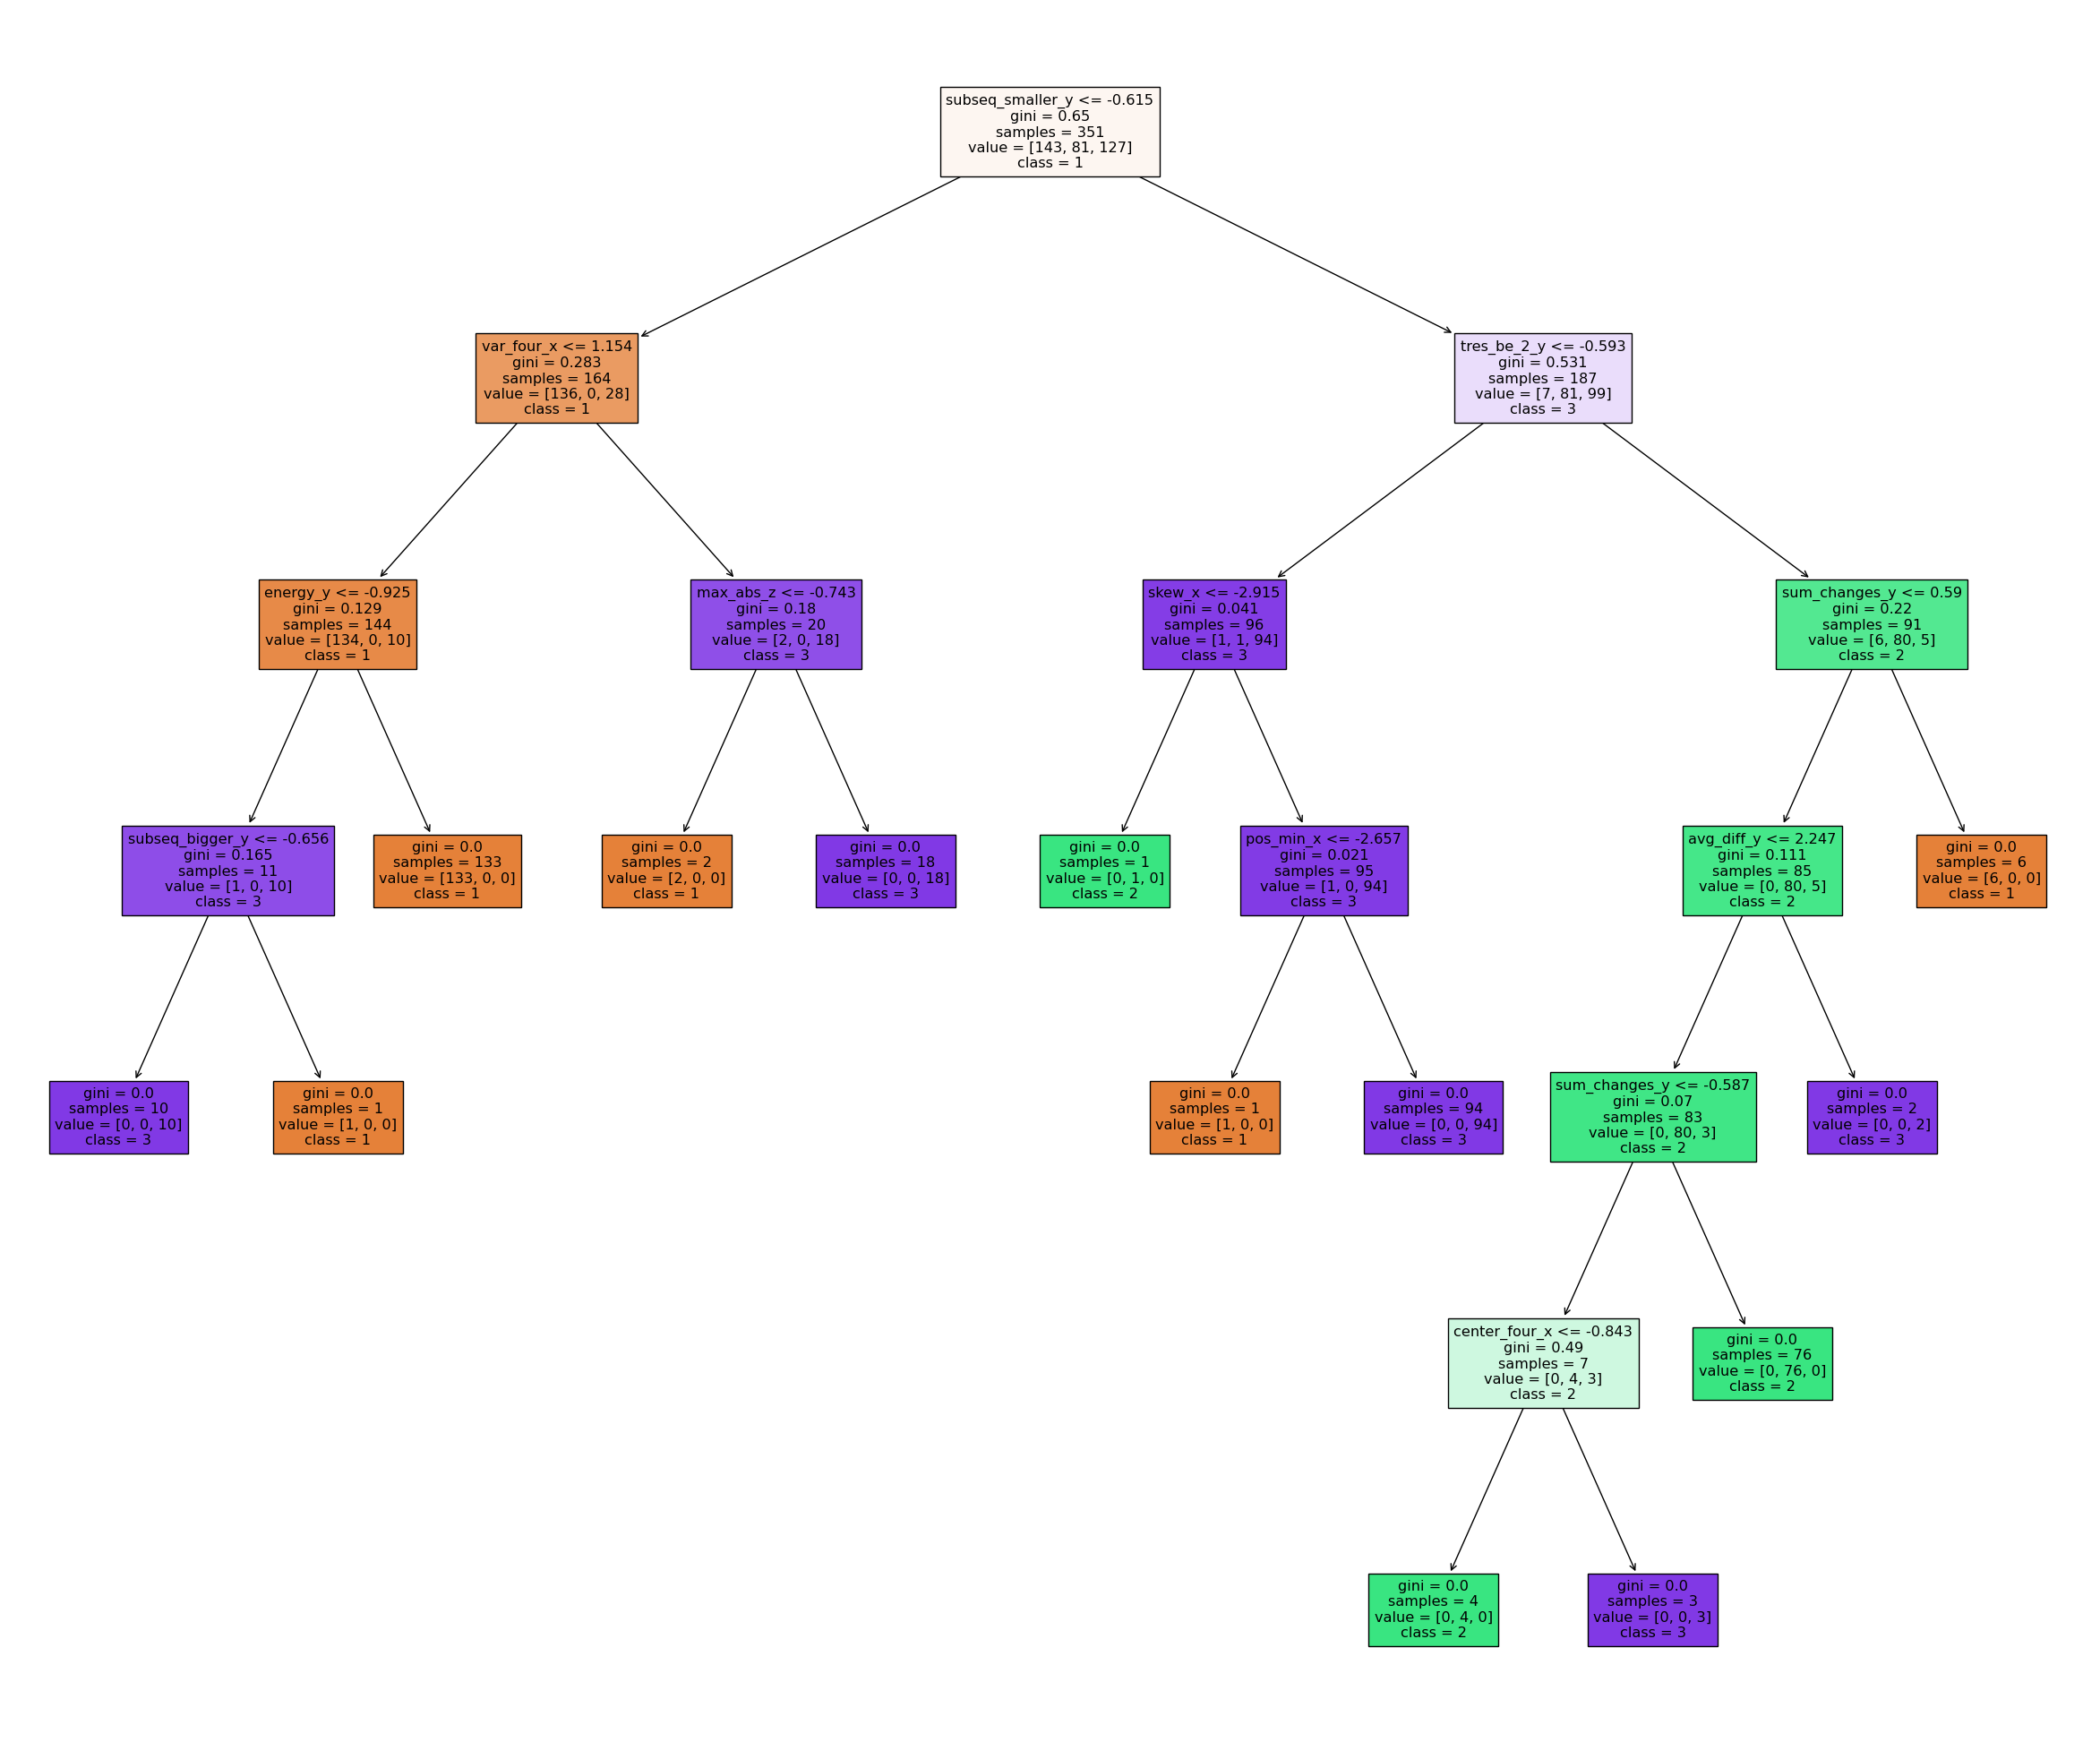

In [19]:
fig=plt.figure(figsize=(30,25))
_ = tree.plot_tree(fitted_tree,feature_names=['energy_x', 'energy_y', 'energy_z', 'max_abs_x', 'max_abs_y', 'max_abs_z',
                     'sum_changes_x', 'sum_changes_y', 'sum_changes_z', 'autocorr_x', 'autocorr_y', 'autocorr_z',
                     'var_x', 'var_y', 'var_z', 'range_x', 'range_y', 'range_z',
                     'tres_ab_1_x', 'tres_ab_1_y', 'tres_ab_1_z','tres_ab_2_x', 'tres_ab_2_y', 'tres_ab_2_z',
                     'tres_ab_3_x', 'tres_ab_3_y', 'tres_ab_3_z',
                    'tres_be_1_x', 'tres_be_1_y', 'tres_be_1_z',
                     'tres_be_2_x', 'tres_be_2_y', 'tres_be_2_z', 'tres_be_3_x', 'tres_be_3_y', 'tres_be_3_z',
                      'center_four_x', 'center-four_y','center_four_z', 'var_four_x', 'var_four_y', 'var_four_z',
                     'skew_x', 'skew_y', 'skew_z',
                     'pos_max_x', 'pos_max_y', 'pos_max_z', 'pos_min_x', 'pos_min_y', 'pos_min_z',
                     'subseq_bigger_x', 'subseq_bigger_y', 'subseq_bigger_z', 'subseq_smaller_x', 'subseq_smaller_y', 'subseq_smaller_z',
                     'avg_diff_x', 'avg_diff_y', 'avg_diff_z','Label'], class_names=['1','2','3','4','5','6','7','8','9','10'],filled=True)

### Compution of precision and recall for the Decision Tree and visualization of the roc curve

Precision: 0.9316239316239316
Recall: 0.9111111111111111

classification report:

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        61
           2       0.79      0.90      0.84        21
           3       0.94      0.83      0.88        35

    accuracy                           0.93       117
   macro avg       0.90      0.91      0.91       117
weighted avg       0.93      0.93      0.93       117



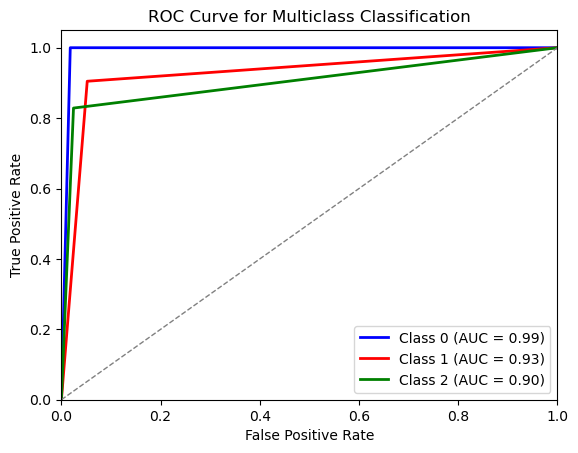

In [20]:
compute_indexes (y_test,decision_tree_pipeline,X_test)
plot_roc (y_test,decision_tree_pipeline,X_test)

### Confusion Matrix

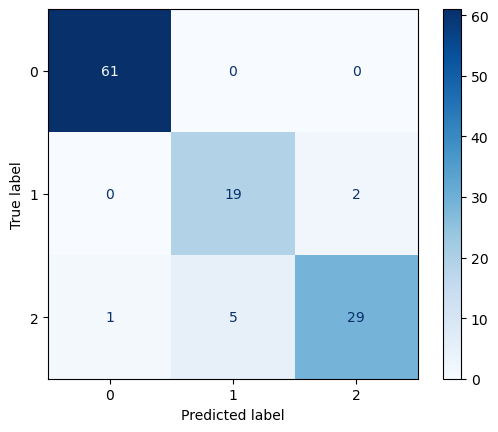

In [21]:
cm =confusion_matrix(y_test, decision_tree_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(cm)

disp.plot(cmap='Blues')

### Feature Importance for the Decision Tree

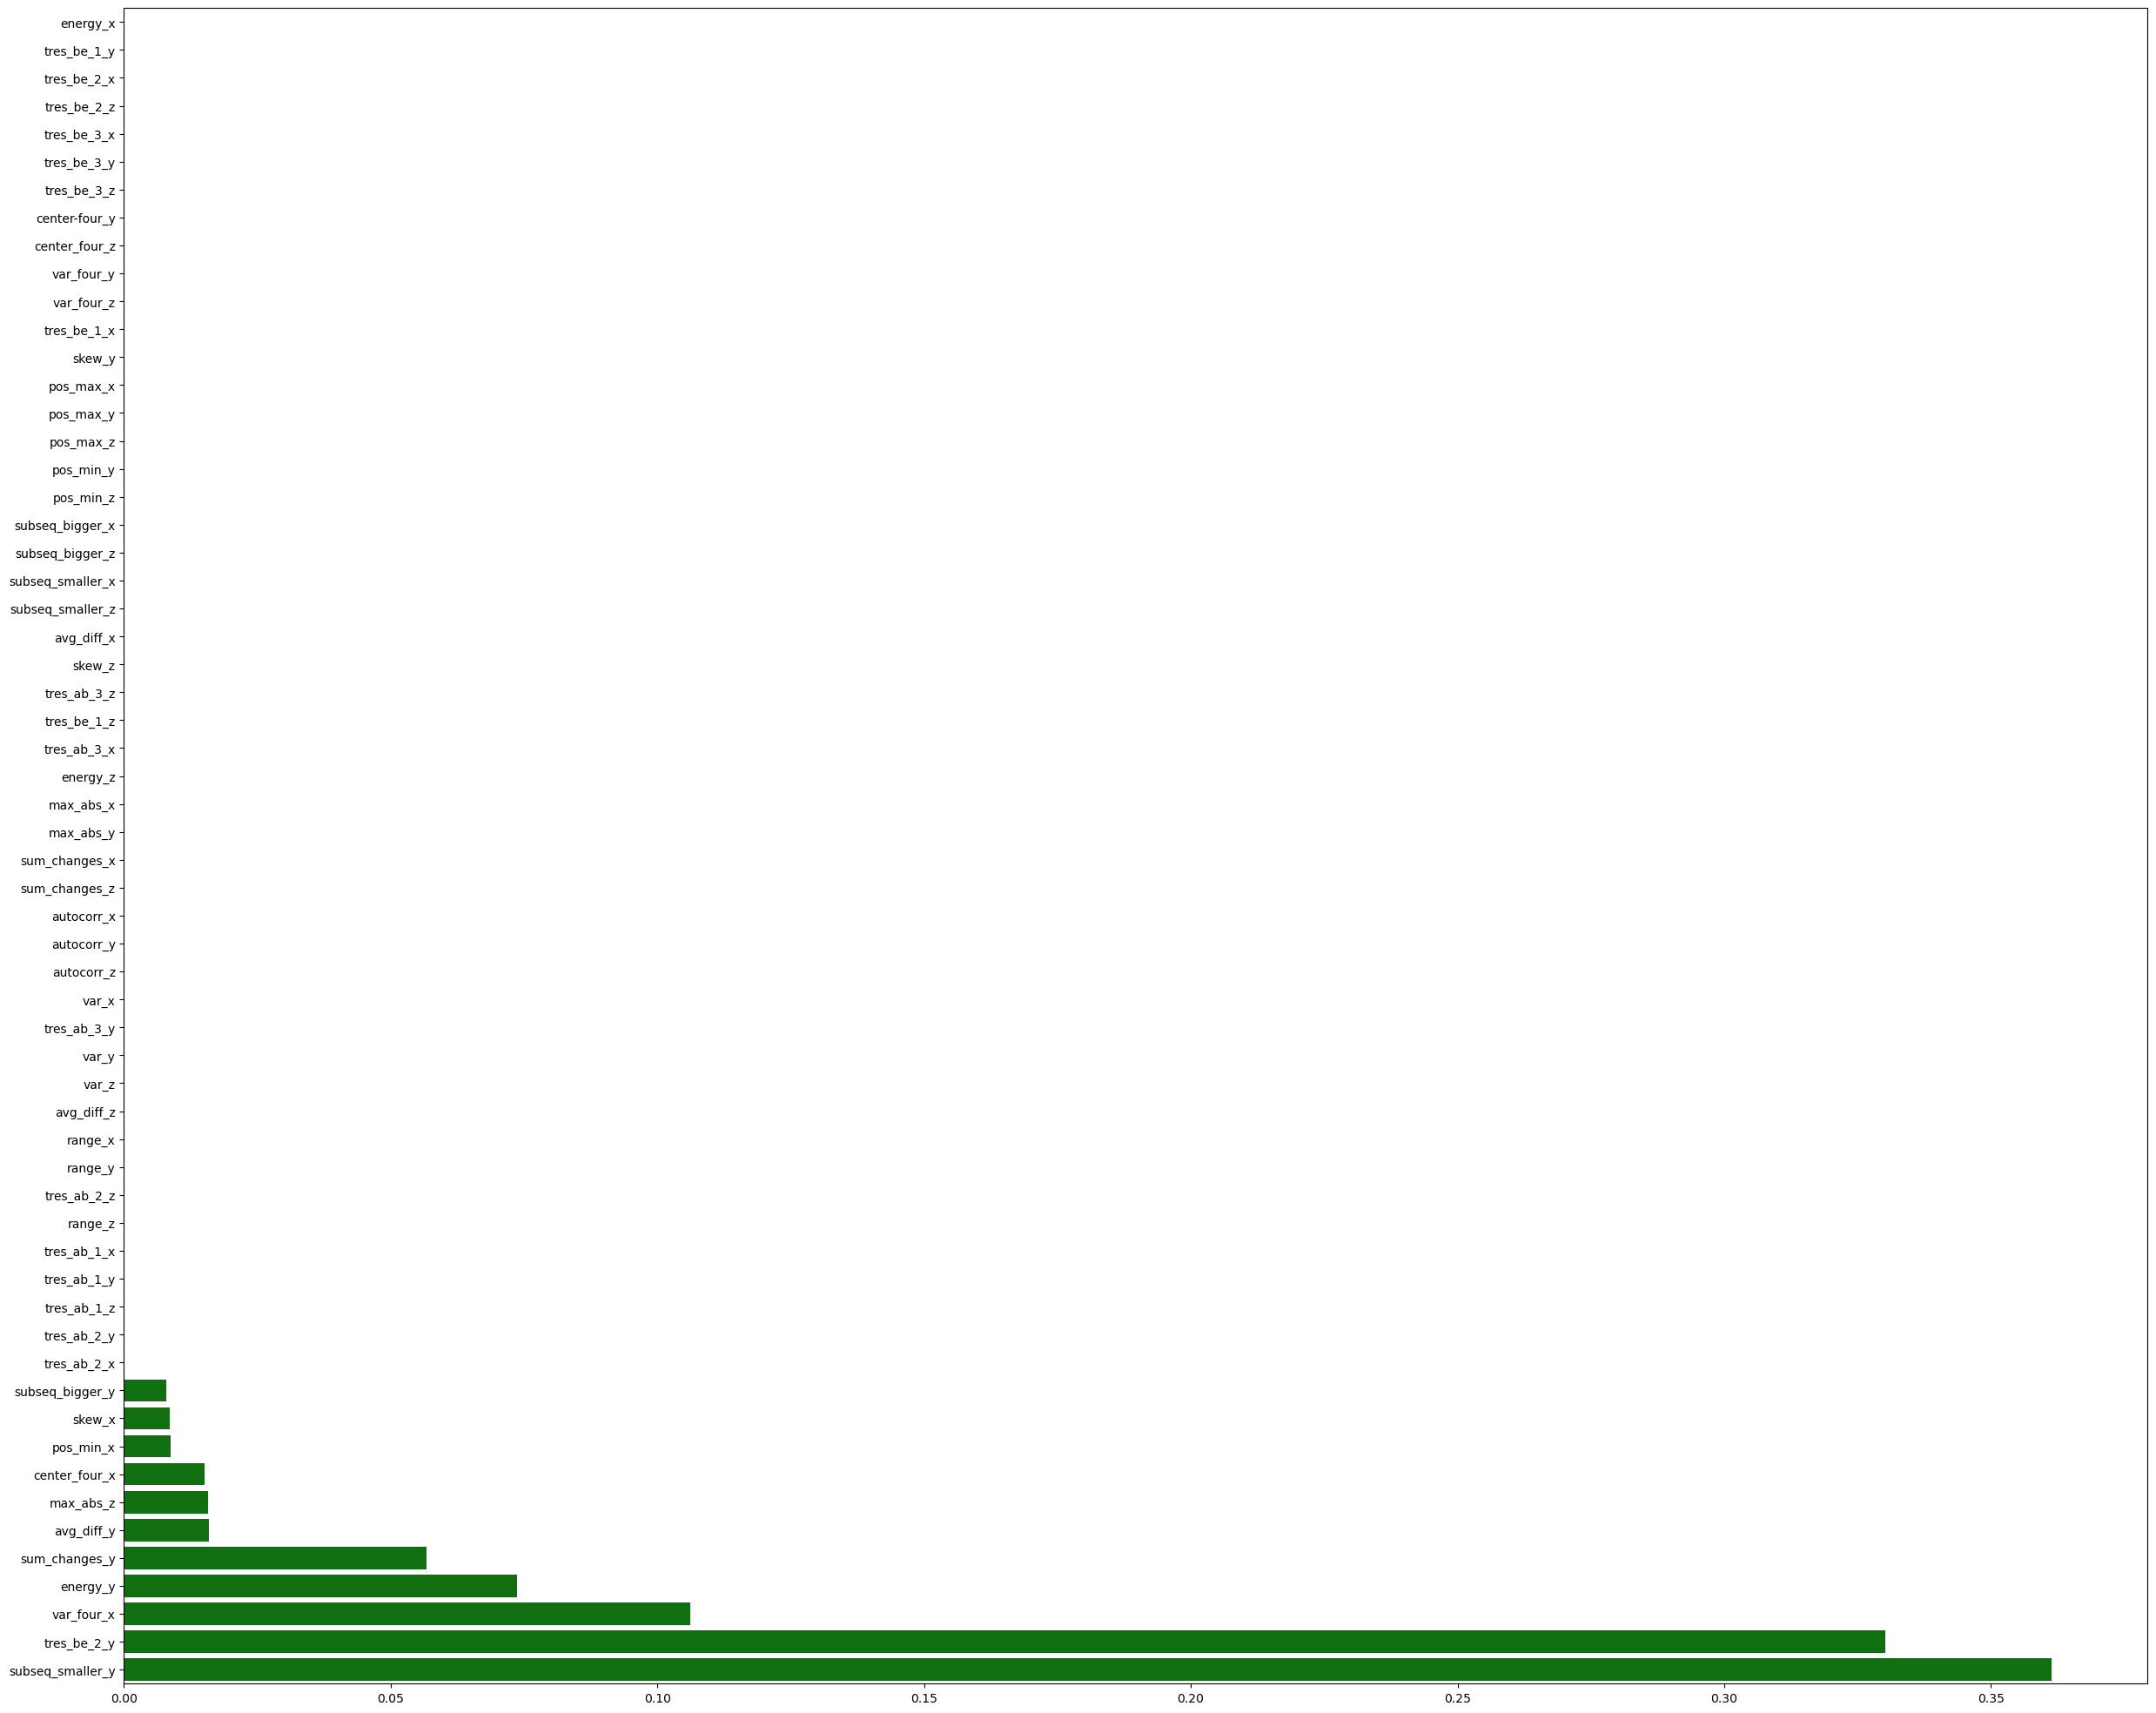

In [22]:
feat_importance_tree = fitted_tree.feature_importances_
GiniScore,j=np.sort(feat_importance_tree),np.argsort(feat_importance_tree)
fig=plt.figure(figsize=(30,25))
_ =sns.barplot(y=decision_tree_pipeline.feature_names_in_[j], x=GiniScore, color='g')

### Define a function to extract important features

In [23]:
def SelectImportantFeatures(X_train, X_test, index_out, model):
    X_important = X_train.copy()
    X_important_test = X_test.copy()
    X_important.drop(model.feature_names_in_[index_out], axis=1, inplace=True)
    X_important_test.drop(model.feature_names_in_[index_out], axis=1, inplace=True)
    return X_important, X_important_test

### Extraction of important features in the Decision Tree

In [24]:
index_out_tree = feat_importance_tree<0.015
X_tree, X_test_tree = SelectImportantFeatures(X_train, X_test, index_out_tree, decision_tree_pipeline)

## Random Forest

### Visualization of each tree of the Random Forest

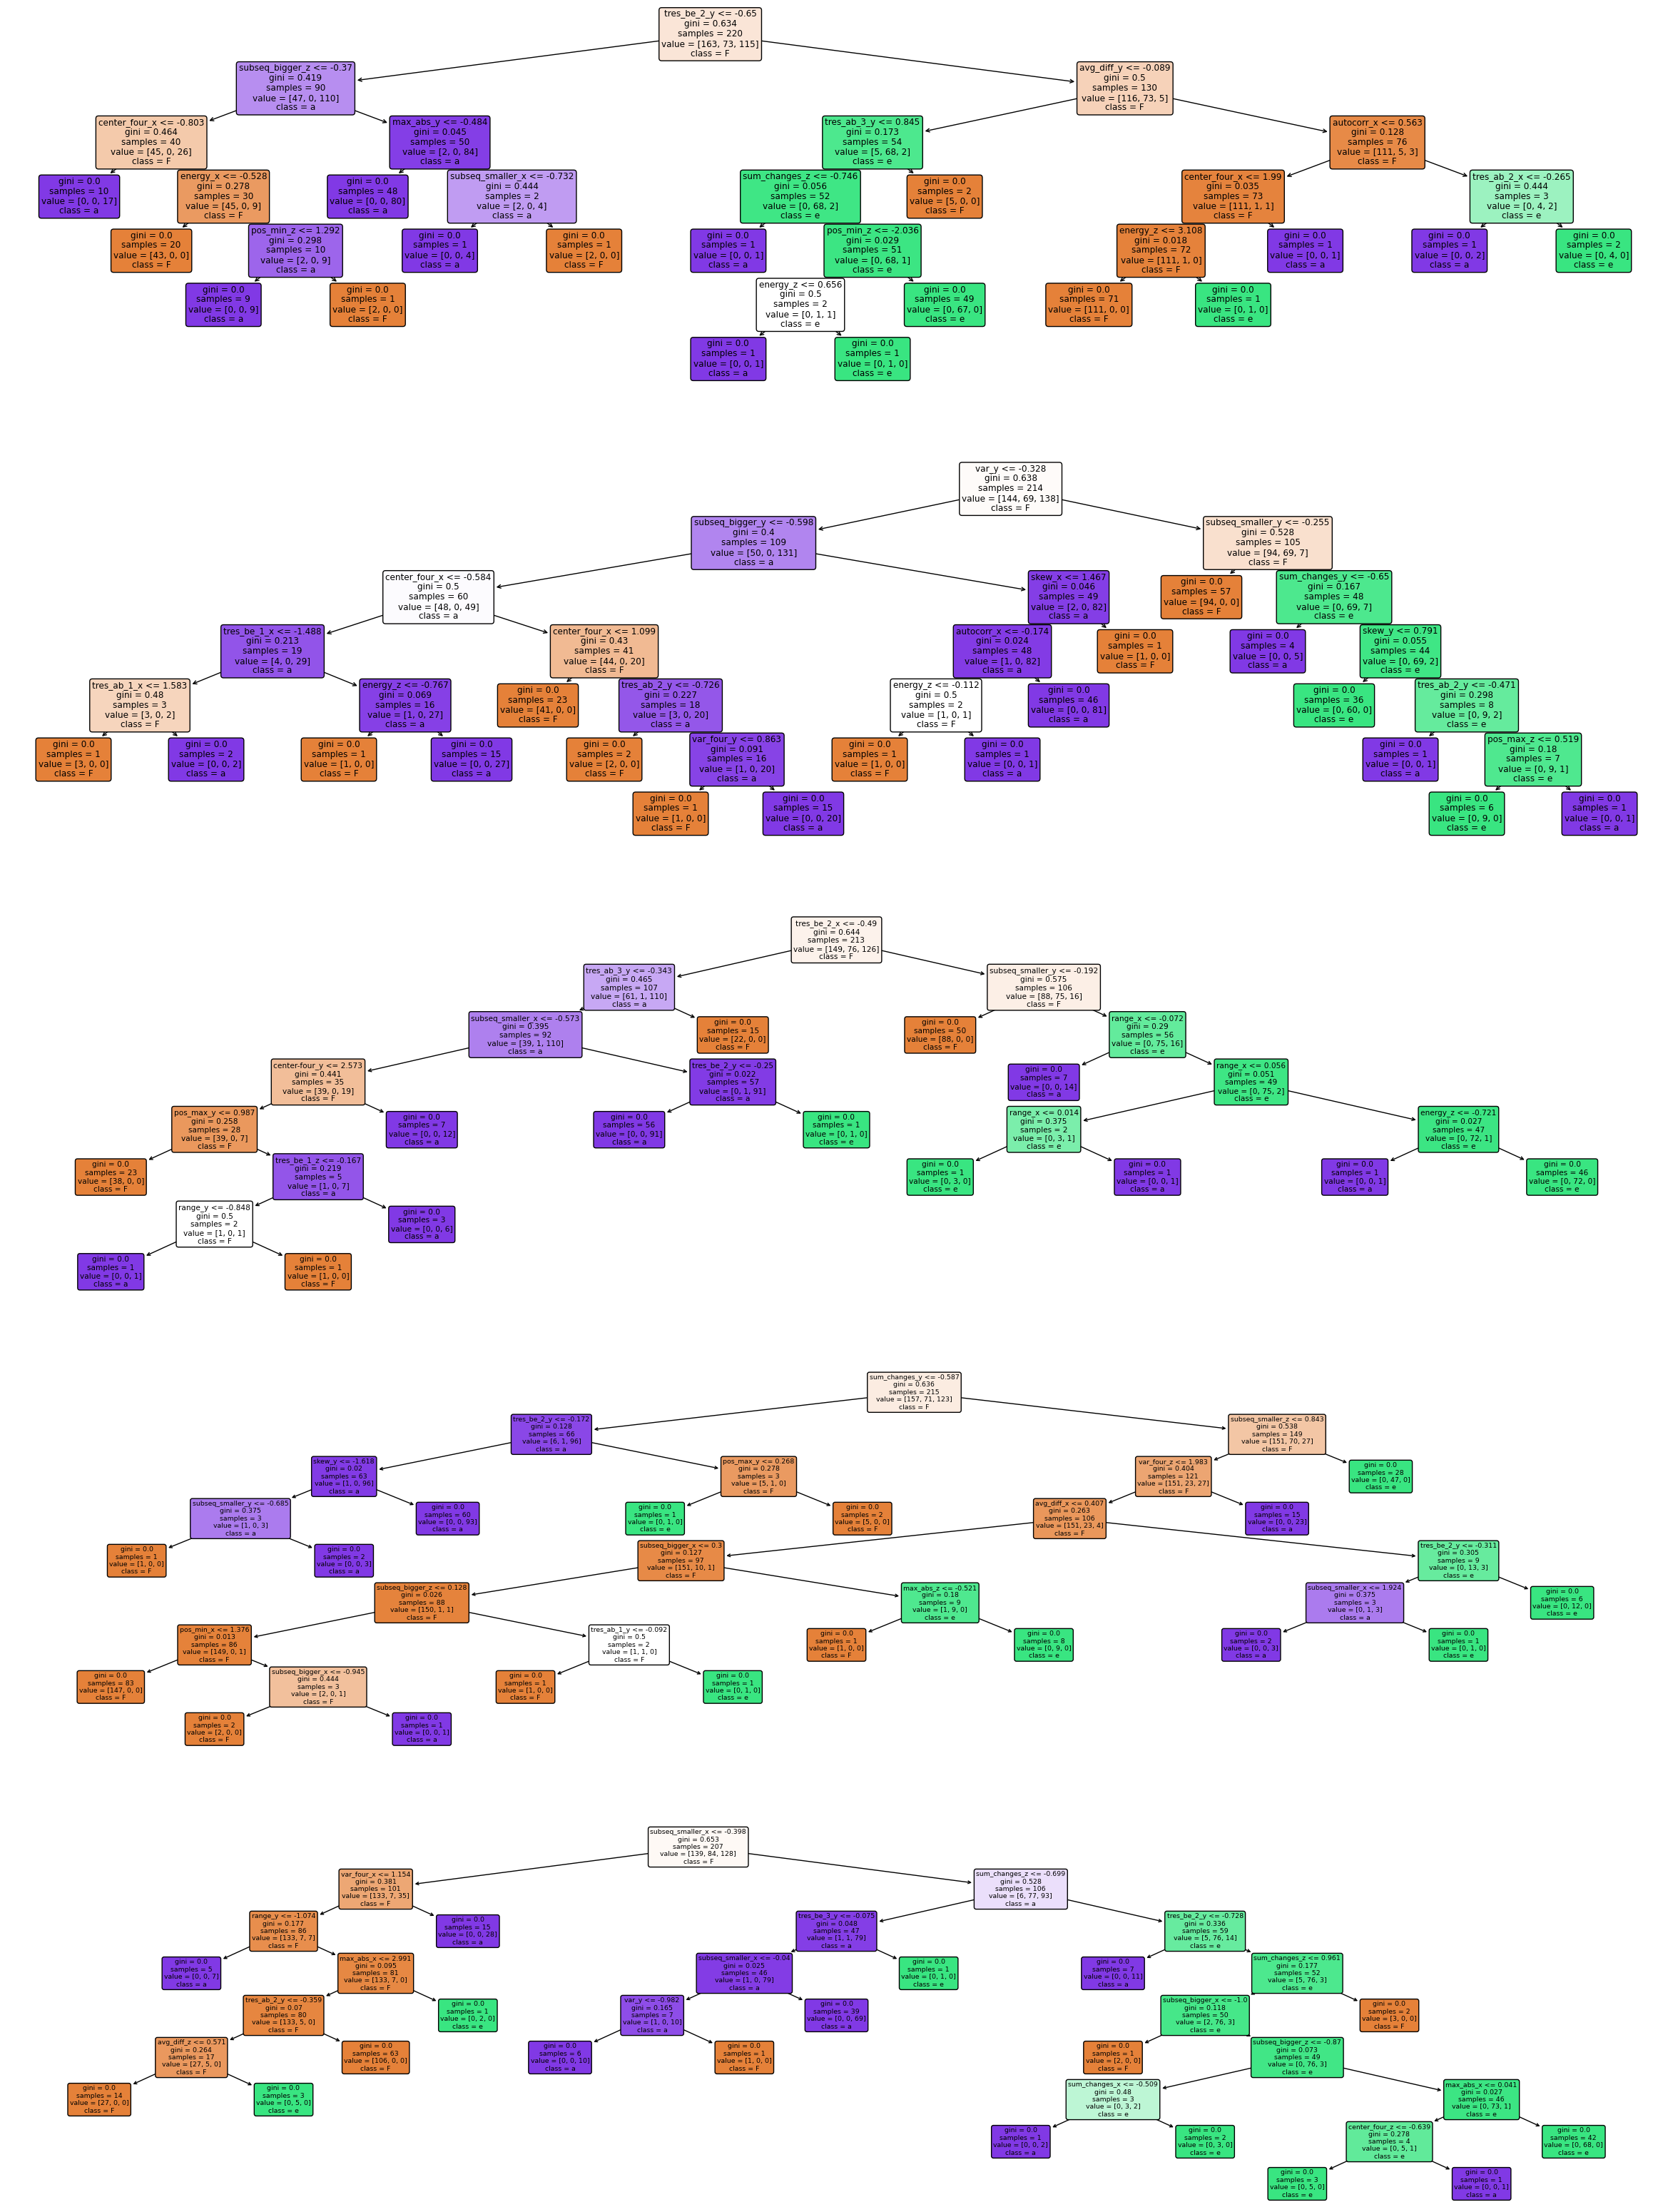

In [25]:
fig, axes = plt.subplots(nrows = 5,ncols = 1,figsize = (30,40))
for index in range(0, 5):
    tree.plot_tree(fitted_random_forest.estimators_[index],
                   feature_names = X_test.iloc[:,0:60].columns, 
                   class_names='Feature',
                   filled = True,
                   impurity=True, 
                   rounded=True,
                   ax = axes[index]);


### Computation of precision and recall for the Random Forest and visualization of the roc curve

Precision: 0.9487179487179487
Recall: 0.9365079365079364

classification report:

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        61
           2       0.87      0.95      0.91        21
           3       1.00      0.86      0.92        35

    accuracy                           0.95       117
   macro avg       0.94      0.94      0.94       117
weighted avg       0.95      0.95      0.95       117



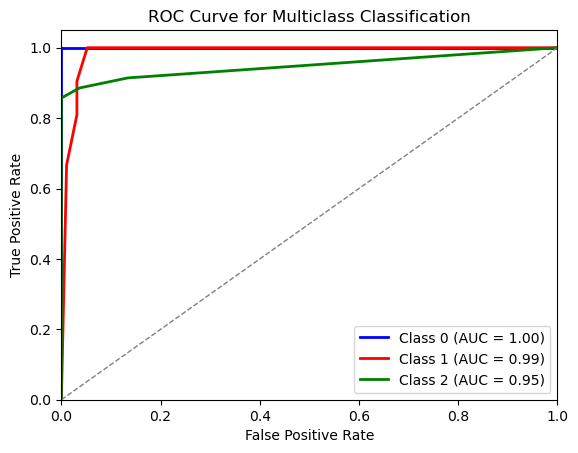

In [26]:
compute_indexes (y_test,random_forest_pipeline,X_test)
plot_roc (y_test,random_forest_pipeline,X_test)

### Confusion Matrix

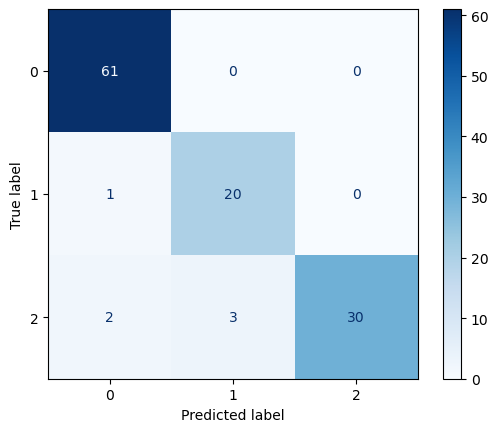

In [27]:
cm =confusion_matrix(y_test, random_forest_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(cm)

disp.plot(cmap='Blues')

### Feature Importance for the Random Forest

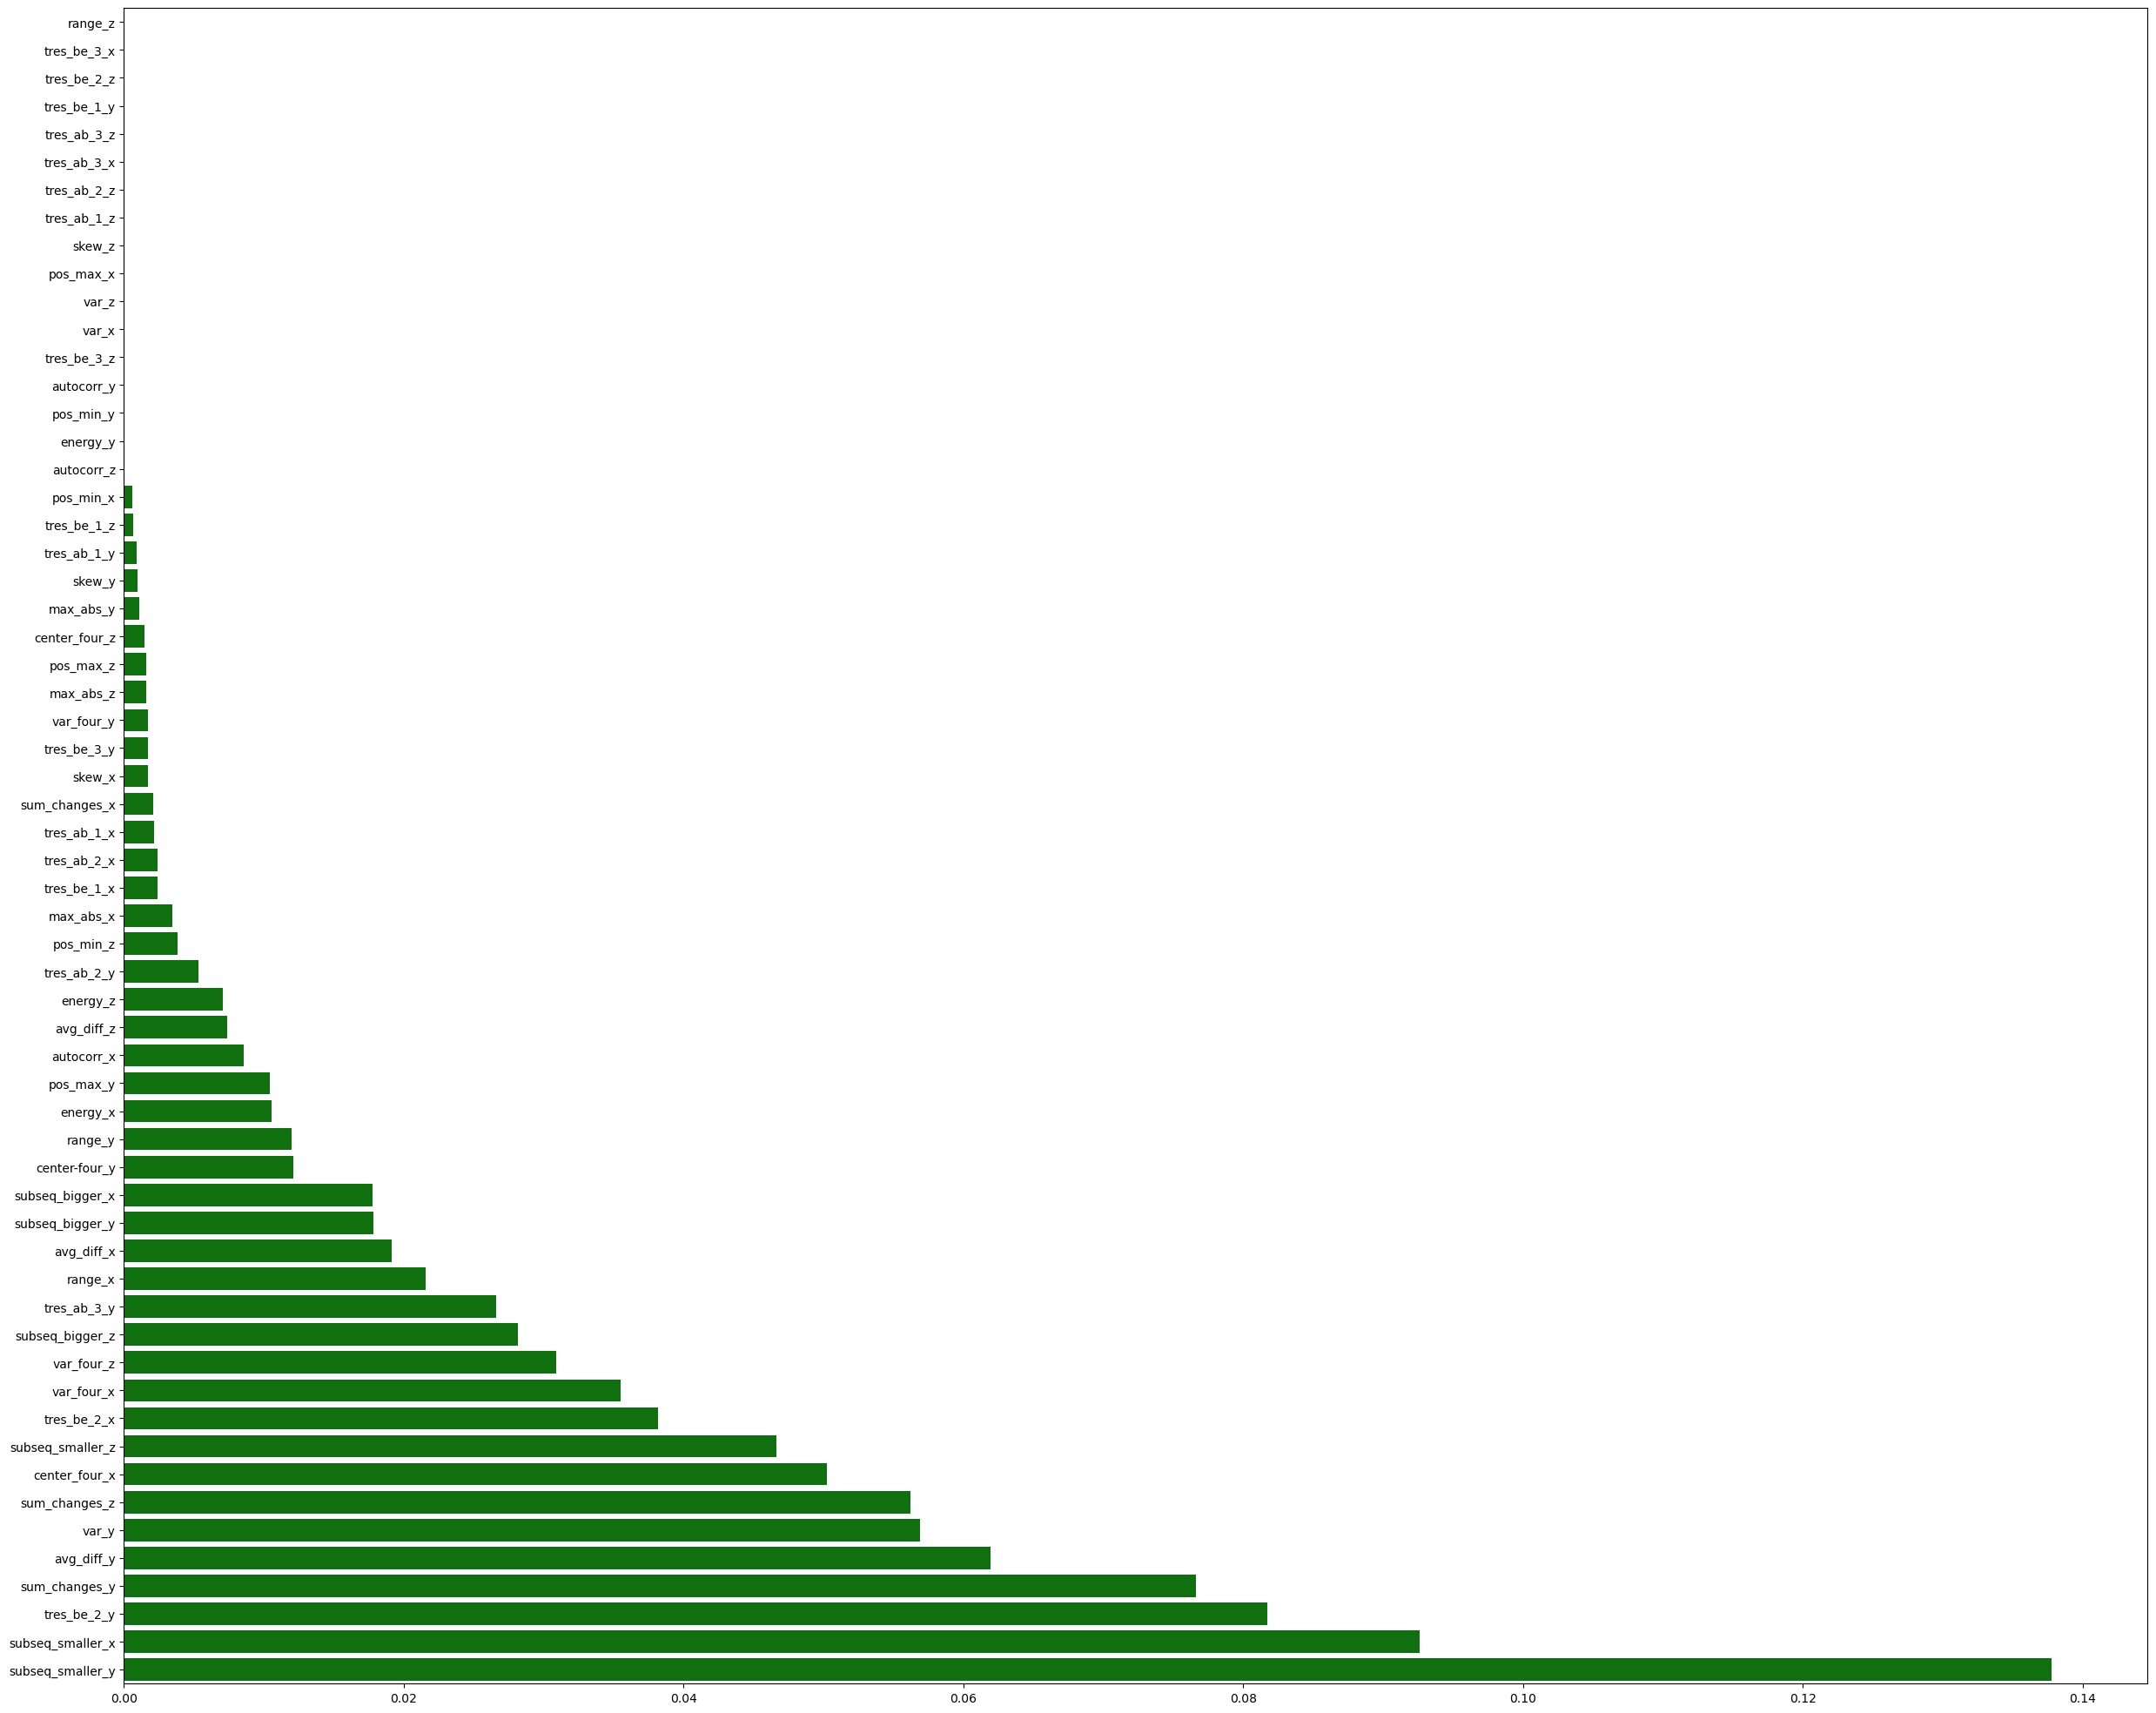

In [28]:
feat_importance_rnd = fitted_random_forest.feature_importances_
GiniScore,j=np.sort(feat_importance_rnd),np.argsort(feat_importance_rnd)
fig=plt.figure(figsize=(30,25))
_ =sns.barplot(y=random_forest_pipeline.feature_names_in_[j], x=GiniScore, color='g')

### Extraction of important features in the Random Forest

In [29]:
index_out_rn = feat_importance_rnd<0.02
X_rn, X_test_rn= SelectImportantFeatures(X_train, X_test, index_out_rn, random_forest_pipeline)

## Logistic Regression

### Computation of precision and recall for the Logistic Regression

In [30]:
compute_indexes (y_test,logistic_regression_pipeline,X_test)

Precision: 0.9572649572649573
Recall: 0.9460317460317459

classification report:

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           2       0.91      0.95      0.93        21
           3       0.97      0.89      0.93        35

    accuracy                           0.96       117
   macro avg       0.95      0.95      0.95       117
weighted avg       0.96      0.96      0.96       117



### Confusion Matrix

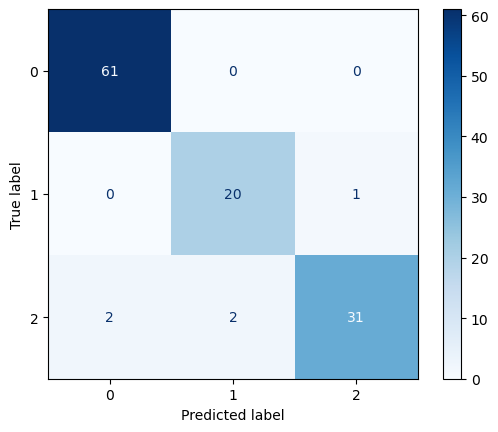

In [31]:
cm =confusion_matrix(y_test, logistic_regression_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(cm)

disp.plot(cmap='Blues')

### Feature importance for the Logistic Regression

<Axes: ylabel='Feature'>

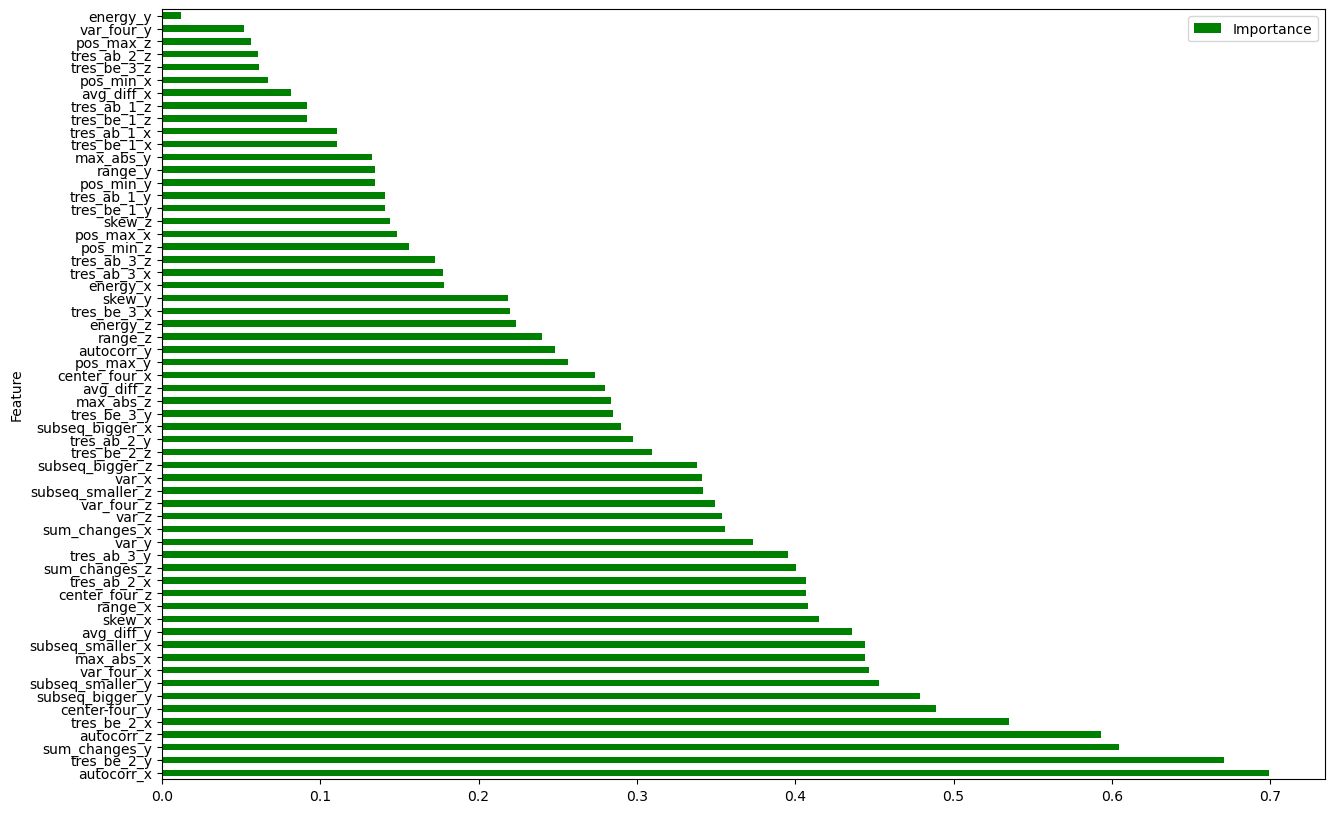

In [32]:
coefficients = fitted_logistic.coef_
feat_importance_log = np.mean(np.abs(coefficients), axis=0)
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': feat_importance_log})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10), color='g')

### Extraction of important features in the Logistic Regression

In [33]:
index_out_log = feat_importance_log<0.4
X_log, X_test_log = SelectImportantFeatures(X_train, X_test, index_out_log, logistic_regression_pipeline)

## Support Vector Machine

### Computation of precision and recall for the SVM

In [34]:
compute_indexes (y_test,svm_pipeline,X_test)

Precision: 0.9829059829059829
Recall: 0.980952380952381

classification report:

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        61
           2       0.95      1.00      0.98        21
           3       1.00      0.94      0.97        35

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117



### Confusion Matrix

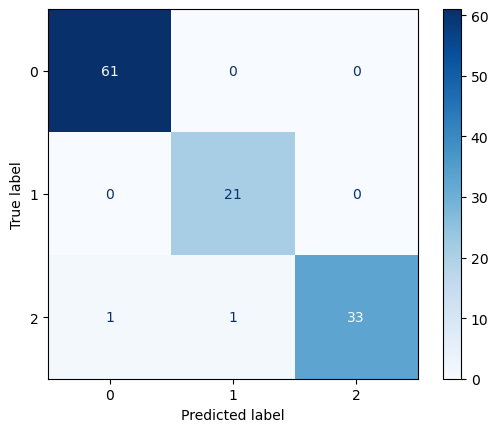

In [35]:
cm =confusion_matrix(y_test, svm_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(cm)

disp.plot(cmap='Blues')

### Feature Importance for the SVM

<Axes: ylabel='Feature'>

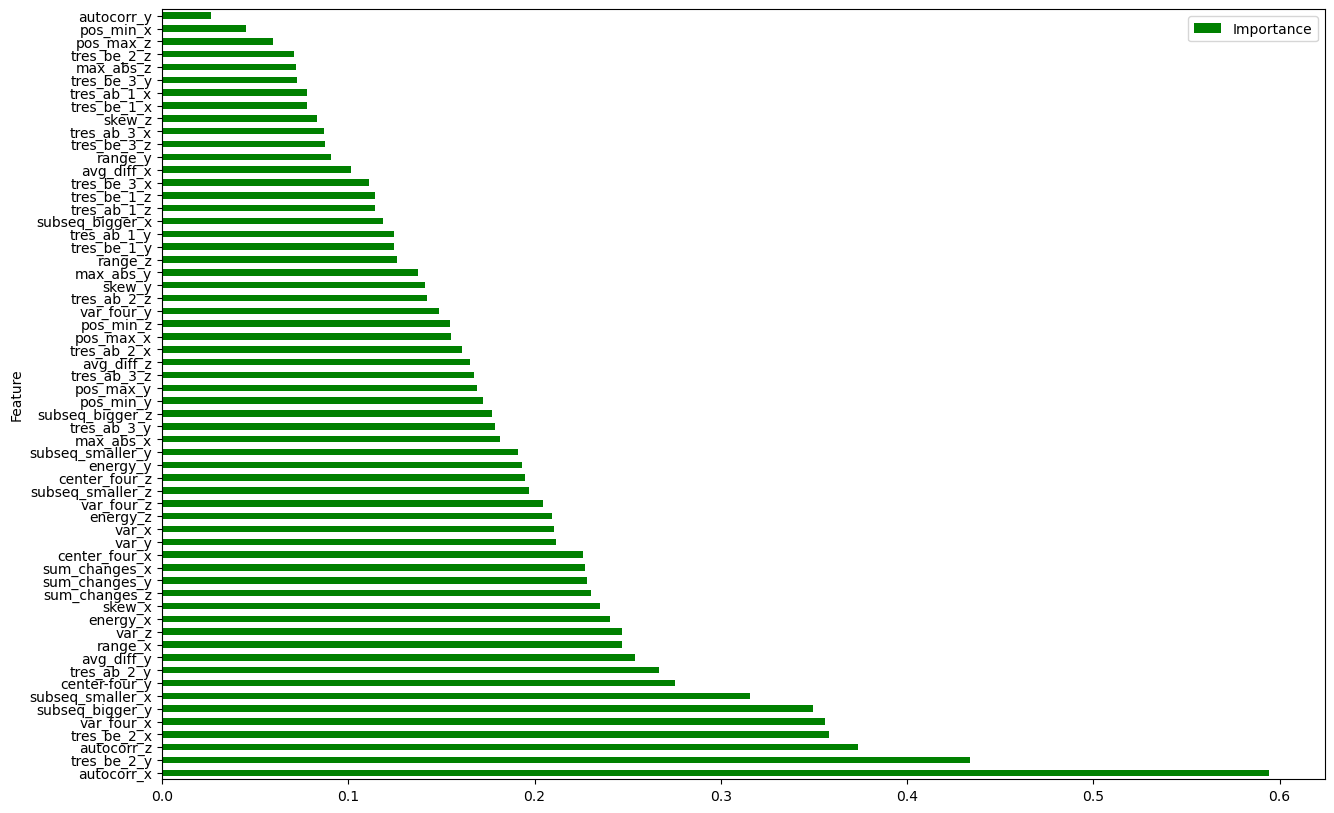

In [36]:
feat_importance_svm = np.mean(np.abs(fitted_svm.coef_), axis=0)
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': feat_importance_svm})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10), color='g')

### Extraction important features in the SVM

In [37]:
index_out_svm = feat_importance_svm<0.2
X_svm, X_test_svm = SelectImportantFeatures(X_train, X_test, index_out_svm, svm_pipeline)

## Bagging

### Computation of precision and recall for Bagging

In [38]:
compute_indexes (y_test,bagging_pipeline,X_test)

Precision: 0.9572649572649573
Recall: 0.9460317460317459

classification report:

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           2       0.91      0.95      0.93        21
           3       0.97      0.89      0.93        35

    accuracy                           0.96       117
   macro avg       0.95      0.95      0.95       117
weighted avg       0.96      0.96      0.96       117



### Confusion Matrix

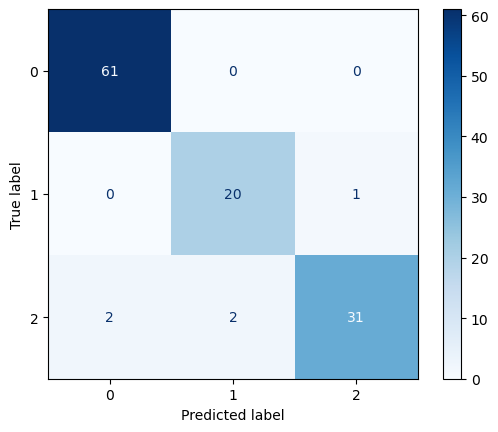

In [39]:
cm =confusion_matrix(y_test, bagging_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(cm)

disp.plot(cmap='Blues')

### Feature Importance for Bagging

<Axes: ylabel='Feature'>

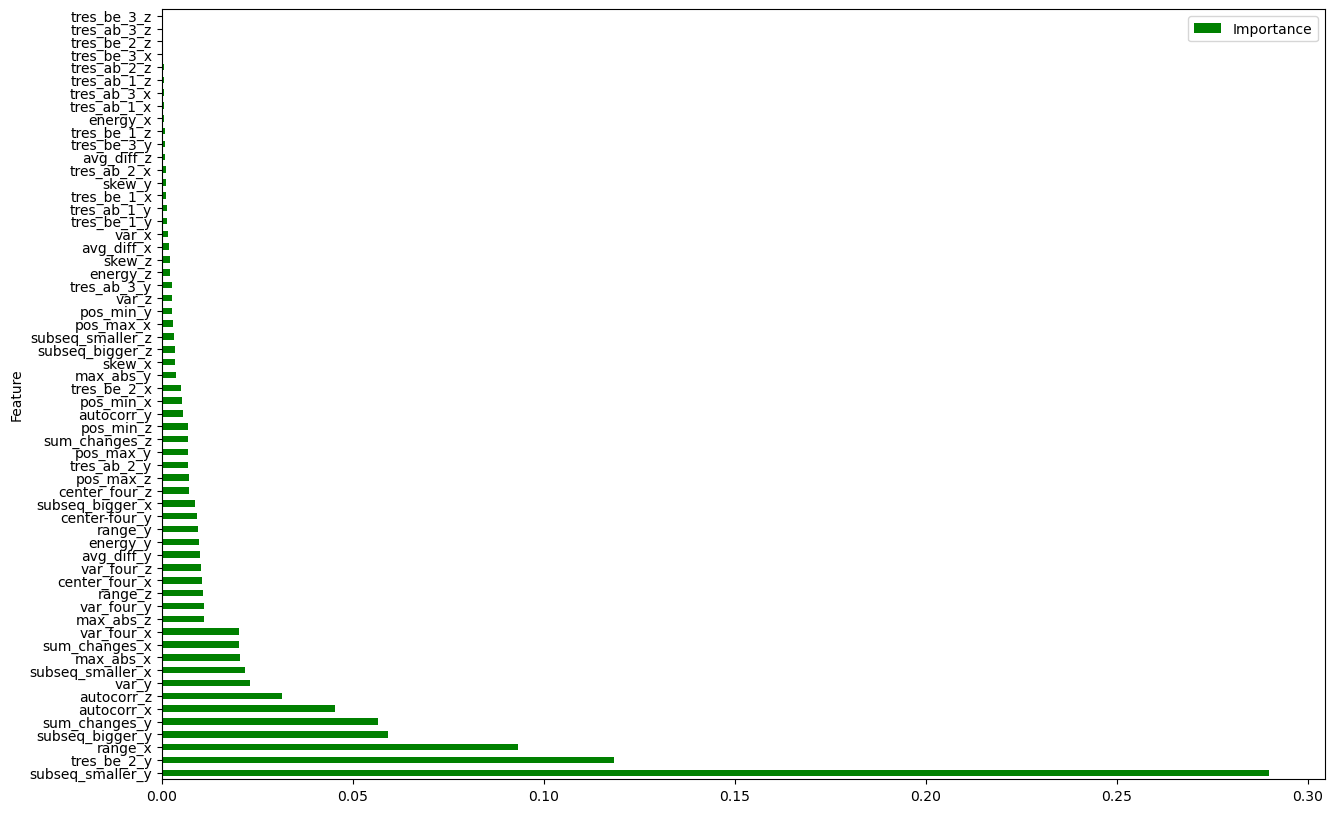

In [40]:
feat_importance_bag = np.mean([ tree.feature_importances_ for tree in fitted_bagging.estimators_], axis=0)
feature_importance = pd.DataFrame({'Feature': X_test.columns,'Importance': feat_importance_bag})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10), color='g')

### Extraction of important features in Bagging

In [41]:
index_out_bag = feat_importance_bag<0.02
X_bag, X_test_bag = SelectImportantFeatures(X_train, X_test, index_out_bag, bagging_pipeline)

## Soft Voting

### Computation of precision and recall for Voting

In [42]:
compute_indexes (y_test,voting_pipeline,X_test)

Precision: 0.9829059829059829
Recall: 0.980952380952381

classification report:

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        61
           2       0.95      1.00      0.98        21
           3       1.00      0.94      0.97        35

    accuracy                           0.98       117
   macro avg       0.98      0.98      0.98       117
weighted avg       0.98      0.98      0.98       117



### Confusion matrix

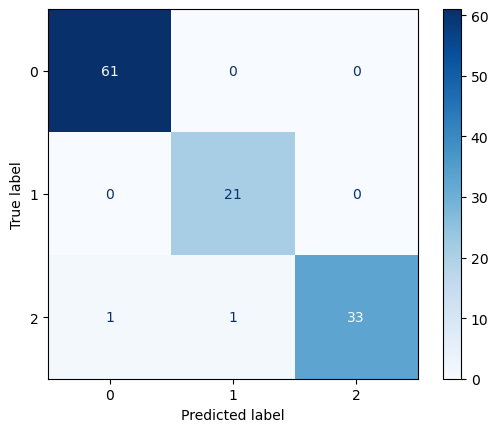

In [43]:
cm =confusion_matrix(y_test, voting_pipeline.predict(X_test))
disp = ConfusionMatrixDisplay(cm)
disp.plot(cmap='Blues')

### Feature Importance for Voting

<Axes: ylabel='Feature'>

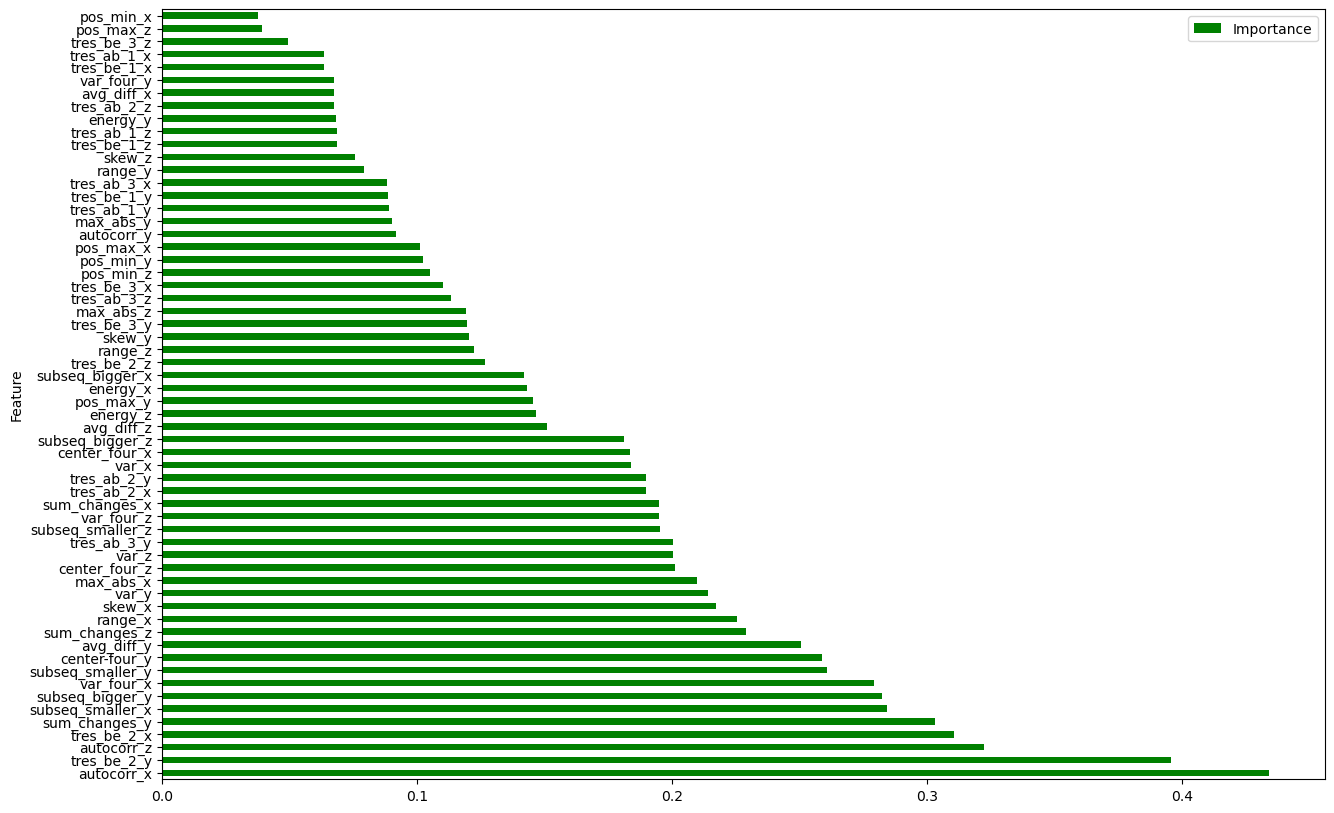

In [44]:
imp = pd.DataFrame({'log': feat_importance_log, 'rnd': feat_importance_rnd, 'svc': feat_importance_svm})
feat_importance_bag = np.mean(imp, axis=1)
feature_importance = pd.DataFrame({'Feature': X_test.columns, 'Importance': feat_importance_bag})
feature_importance = feature_importance.sort_values('Importance', ascending=False)
feature_importance.plot(x='Feature', y='Importance', kind='barh', figsize=(15, 10), color='g')

### Extraction of important features in Voting

In [45]:
index_out_voting = feat_importance_bag<0.20
X_voting, X_test_voting = SelectImportantFeatures(X_train, X_test, index_out_voting, voting_pipeline)

## Models using the reduced datasets

In [46]:
# Create separate instances of each estimator for the reduced models

decision_tree_pipeline_red = make_pipeline(
    StandardScaler(),
    clone(decision_tree)
)

random_forest_pipeline_red = make_pipeline(
    StandardScaler(),
    clone(random_forest)
)

logistic_regression_pipeline_red = make_pipeline(
    StandardScaler(),
    clone(logistic_regression)
)

svm_pipeline_red = make_pipeline(
    StandardScaler(),
    clone(svm_classifier)
)

bagging_pipeline_red = make_pipeline(
    StandardScaler(),
    clone(bagging_classifier)
)

voting_pipeline_red = make_pipeline(
    StandardScaler(),
    clone(voting_classifier)
)
# Fit each model separately within the same pipeline

decision_tree_pipeline_red.fit(X_tree, y_train)
random_forest_pipeline_red.fit(X_rn, y_train)
logistic_regression_pipeline_red.fit(X_log, y_train)
svm_pipeline_red.fit(X_svm, y_train)
bagging_pipeline_red.fit(X_bag, y_train)
voting_pipeline_red.fit(X_voting, y_train)

# Evaluate each model individually

decision_tree_score_red = decision_tree_pipeline_red.score(X_test_tree, y_test)
random_forest_score_red = random_forest_pipeline_red.score(X_test_rn, y_test)
logistic_regression_score_red = logistic_regression_pipeline_red.score(X_test_log, y_test)
svm_score_red = svm_pipeline_red.score(X_test_svm, y_test)
bagging_score_red = bagging_pipeline_red.score(X_test_bag, y_test)
voting_score_red = voting_pipeline_red.score(X_test_voting, y_test)

# accuracy of reduced models
print("Decision Tree model score:", decision_tree_score_red)
print("Random Forest model score:", random_forest_score_red)
print("Logistic Regression model score:", logistic_regression_score_red)
print("SVM model score:", svm_score_red)
print("Bagging model score:", bagging_score_red)
print("Voting model score:", voting_score_red)

Decision Tree model score: 0.9316239316239316
Random Forest model score: 0.9401709401709402
Logistic Regression model score: 0.9487179487179487
SVM model score: 0.9658119658119658
Bagging model score: 0.9487179487179487
Voting model score: 0.9658119658119658


### Comparison between the accuracy of the reduced models and the original ones

In [47]:
# accuracy of complete models
print("Decision Tree model score:", decision_tree_score)
print("Random Forest model score:", random_forest_score)
print("Logistic Regression model score:", logistic_regression_score)
print("SVM model score:", svm_score)
print("Bagging model score:", bagging_score)
print("Voting model score:", voting_score)

Decision Tree model score: 0.9316239316239316
Random Forest model score: 0.9487179487179487
Logistic Regression model score: 0.9572649572649573
SVM model score: 0.9829059829059829
Bagging model score: 0.9572649572649573
Voting model score: 0.9829059829059829


### Definition of a function to compare the confusion matrix of the reduced model and the original one

In [48]:
def Confusion_matrices(X_test_tot, X_test_red, y_test, tot_model_pipeline, red_model_pipeline):
    fig, axes = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
    
    cm_tot =confusion_matrix(y_test, tot_model_pipeline.predict(X_test_tot))
    disp_tot = ConfusionMatrixDisplay(cm_tot)
    disp_tot.plot(cmap='Blues', ax=axes[0])
    axes[0].set_title("Confusion Matrix - Full Model")
    
    cm_red =confusion_matrix(y_test, red_model_pipeline.predict(X_test_red))
    disp_red = ConfusionMatrixDisplay(cm_red)
    disp_red.plot(cmap='Blues', ax=axes[1])
    axes[1].set_title("Confusion Matrix - Reduced Model")

### Confusion matrices of the Decision Tree

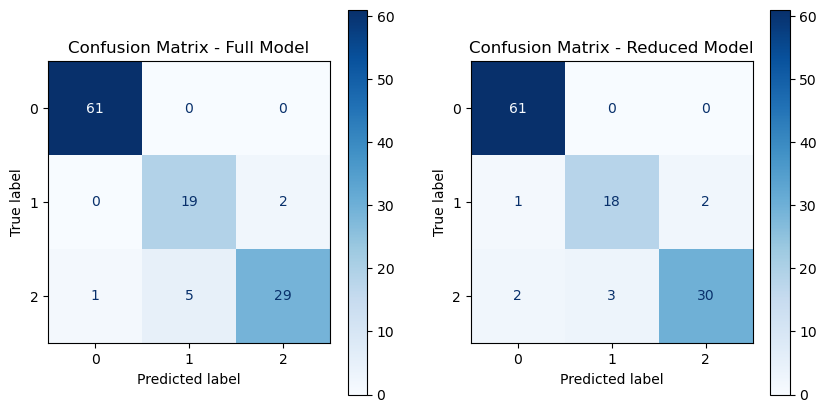

In [49]:
Confusion_matrices(X_test, X_test_tree, y_test, decision_tree_pipeline, decision_tree_pipeline_red)

### Precision and recall of the reduced Decision Tree

In [50]:
compute_indexes (y_test,decision_tree_pipeline_red,X_test_tree)

Precision: 0.9316239316239316
Recall: 0.9047619047619048

classification report:

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        61
           2       0.86      0.86      0.86        21
           3       0.94      0.86      0.90        35

    accuracy                           0.93       117
   macro avg       0.92      0.90      0.91       117
weighted avg       0.93      0.93      0.93       117



### Confusion matrices of Random Forest

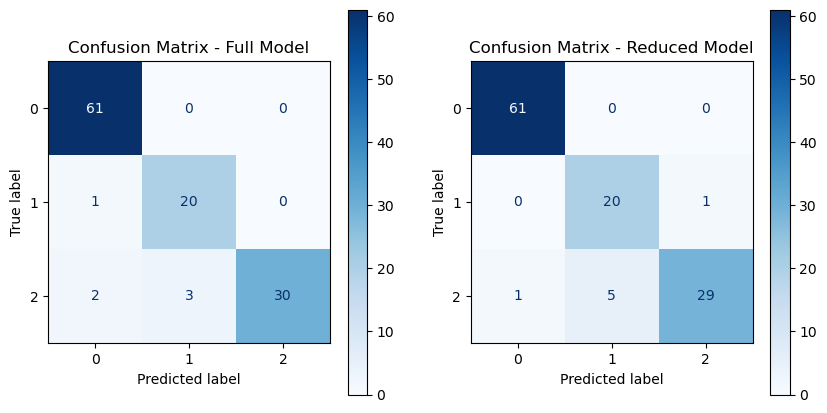

In [51]:
Confusion_matrices(X_test, X_test_rn, y_test, random_forest_pipeline, random_forest_pipeline_red)

### Precision and recall of the reduced Random Forest

In [52]:
compute_indexes (y_test,random_forest_pipeline_red,X_test_rn)

Precision: 0.9401709401709402
Recall: 0.9269841269841269

classification report:

              precision    recall  f1-score   support

           1       0.98      1.00      0.99        61
           2       0.80      0.95      0.87        21
           3       0.97      0.83      0.89        35

    accuracy                           0.94       117
   macro avg       0.92      0.93      0.92       117
weighted avg       0.95      0.94      0.94       117



### Confusion matrices of Logistic Regression

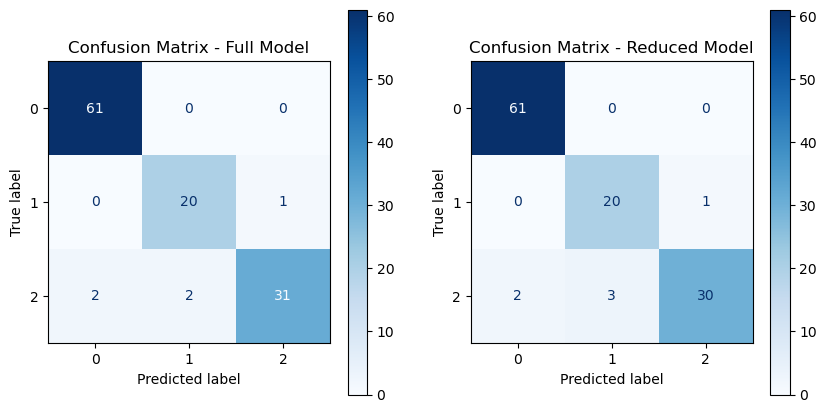

In [53]:
Confusion_matrices(X_test, X_test_log, y_test, logistic_regression_pipeline, logistic_regression_pipeline_red)

### Precision and recall of the reduced Logistic Regression

In [54]:
compute_indexes (y_test,logistic_regression_pipeline_red,X_test_log)

Precision: 0.9487179487179487
Recall: 0.9365079365079364

classification report:

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           2       0.87      0.95      0.91        21
           3       0.97      0.86      0.91        35

    accuracy                           0.95       117
   macro avg       0.94      0.94      0.93       117
weighted avg       0.95      0.95      0.95       117



### Confusion matrices of SVM

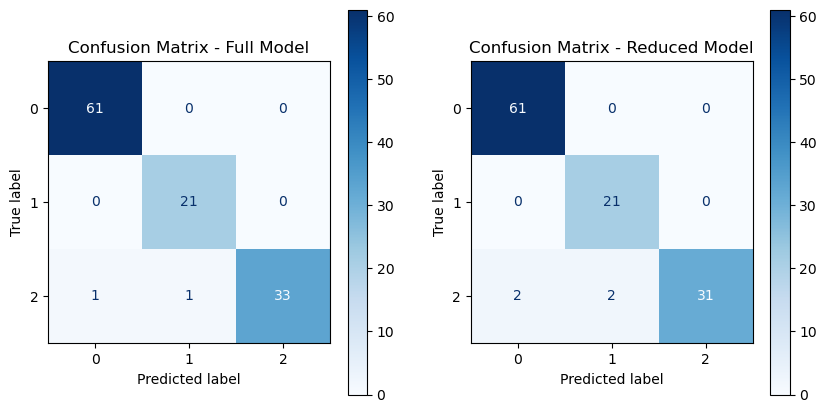

In [55]:
Confusion_matrices(X_test, X_test_svm, y_test, svm_pipeline, svm_pipeline_red)

### Precision and recall of the reduced SVM

In [56]:
compute_indexes (y_test,svm_pipeline_red,X_test_svm)

Precision: 0.9658119658119658
Recall: 0.9619047619047619

classification report:

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           2       0.91      1.00      0.95        21
           3       1.00      0.89      0.94        35

    accuracy                           0.97       117
   macro avg       0.96      0.96      0.96       117
weighted avg       0.97      0.97      0.97       117



### Confusion matrices of Bagging

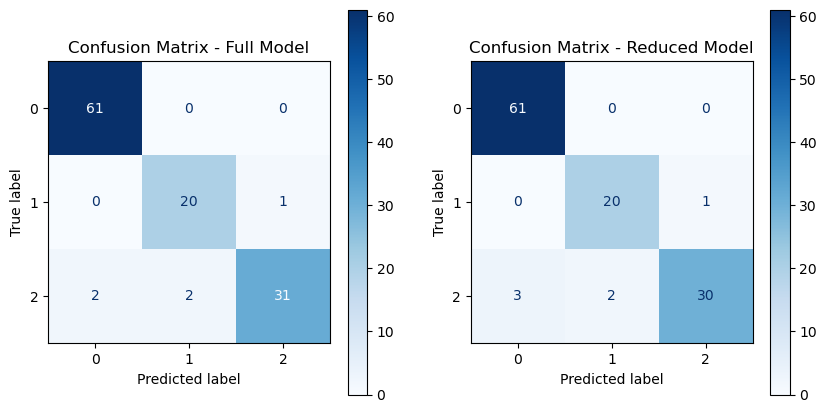

In [57]:
Confusion_matrices(X_test, X_test_bag, y_test, bagging_pipeline, bagging_pipeline_red)

### Precision and recall of the reduced Bagging

In [58]:
compute_indexes (y_test,bagging_pipeline_red,X_test_bag)

Precision: 0.9487179487179487
Recall: 0.9365079365079364

classification report:

              precision    recall  f1-score   support

           1       0.95      1.00      0.98        61
           2       0.91      0.95      0.93        21
           3       0.97      0.86      0.91        35

    accuracy                           0.95       117
   macro avg       0.94      0.94      0.94       117
weighted avg       0.95      0.95      0.95       117



### Confusion matrices of Voting

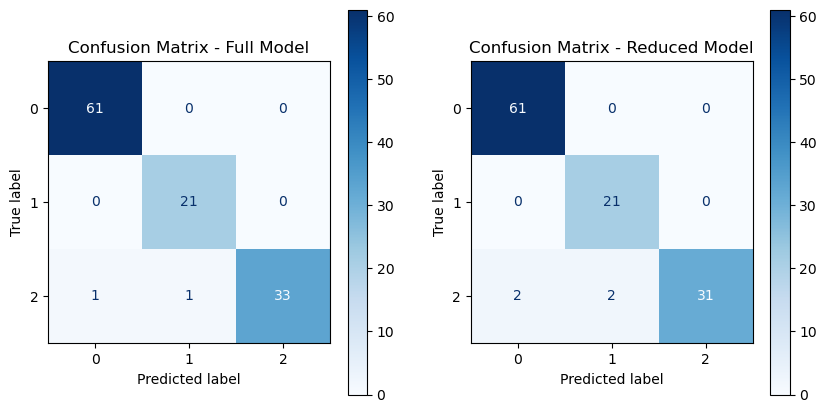

In [59]:
Confusion_matrices(X_test, X_test_voting, y_test, voting_pipeline, voting_pipeline_red)

### Precision and recall of the reduced Voting

In [60]:
compute_indexes (y_test,voting_pipeline_red,X_test_voting)

Precision: 0.9658119658119658
Recall: 0.9619047619047619

classification report:

              precision    recall  f1-score   support

           1       0.97      1.00      0.98        61
           2       0.91      1.00      0.95        21
           3       1.00      0.89      0.94        35

    accuracy                           0.97       117
   macro avg       0.96      0.96      0.96       117
weighted avg       0.97      0.97      0.97       117

